<a name="outline"></a>

## Outline

- [Task 1](#task-1): Regression
  - [1.1](#q11) Linear regression
  - [1.2](#q12) Ridge regression
  - [1.3](#q13) Relaxation of Lasso regression
- [Task 2](#task-2): Classification
  - [2.1](#q21) kNN classifier
  - [2.2](#q22) Random forest 
  - [2.3](#q23) Support vector machine (SVM) 
- [Task 3](#task-3): Mastery component 
  - [3.1](#q31) Logistic regression and bagging 
  - [3.2](#q32) Kernelised SVM classifier 

In [1]:
# Imports that will be used throughout the coursework
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from numpy.ma.core import log2

<a name="task-1"></a>
# Task 1: Regression [^](#outline)

Task 1 deals with utilising a modified chemistry data set based on molecular descriptors for an array of chemicals, associated with the toxicity towards fish. 

Each sample in the dataset (rows) corresponds to a chemical substance characterised by 10 features (descriptors, columns). We will consider the toxicity level (column 'LC50') as the target variable to regress. In Task 1, three models are employed; Linear regression, Ridge regression and Relaxation of Lasso regression.

### Data Loading


---
In this section we import the data chemistry_samples.csv , chemistry_test.csv using the pandas module and perform some check. 

In [2]:
# load samples to train the model as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')
# load test set to validate the implementation of the model 
chemistry_test = pd.read_csv('chemistry_test.csv')

In [3]:
# Checking the first five rows of the dataset chemistry_samples
chemistry_samples.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
0,3.661280,0.658363,1.602232,1.994272,0.836488,3.153623,15.893033,-27.724370,0.059355,0.756698,5.506249
1,3.936362,1.154287,1.146997,0.904295,2.948308,5.141095,13.590177,-31.821521,-13.408855,1.161298,6.636791
2,0.964144,0.415485,1.481028,2.136585,0.043679,-1.156783,15.989419,-3.699312,2.561525,0.500115,1.563388
3,2.074617,1.417296,0.486216,0.000908,-0.066980,2.610960,7.962046,-16.374439,2.448975,1.481888,6.248432
4,1.448569,0.836892,1.951012,0.028318,-0.039121,1.851095,22.285266,-9.526361,2.870400,0.649234,3.676796


We immediately observe that the data consists of 10 descriptors and that the data is clean with no missing values. We notice that some values are an order of magnitude greater than others and we explore standardising the data to see if the accuracy is effected.  

We now define our training and test predictor variables and the target variable. 

In [4]:
features = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'FV1', 'VFV', 'FV2', 'FV3'] # aquiring feature lables

# Defining the training set
X_Train_Original_Reg = chemistry_samples[features] # Predictor variables
Y_Train_Reg = chemistry_samples['LC50'] # Target variable

# Defining the test set
X_Test_Original_Reg = chemistry_test[features]
Y_Test_Reg = chemistry_test['LC50']

# # Convert our pandas frame into numpy arrays
# X_Train_Original = X_Train_Original.to_numpy() # convert to numpy
# Y_Train =  Y_Train.to_numpy()

# X_Test_Original = X_Test.to_numpy() # convert to numpy
# Y_Test = Y_Test.to_numpy()

In [5]:
X_Train_Original_Reg.head() # perform a check to see that the correct features are used

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
0,3.661280,0.658363,1.602232,1.994272,0.836488,3.153623,15.893033,-27.724370,0.059355,0.756698
1,3.936362,1.154287,1.146997,0.904295,2.948308,5.141095,13.590177,-31.821521,-13.408855,1.161298
2,0.964144,0.415485,1.481028,2.136585,0.043679,-1.156783,15.989419,-3.699312,2.561525,0.500115
3,2.074617,1.417296,0.486216,0.000908,-0.066980,2.610960,7.962046,-16.374439,2.448975,1.481888
4,1.448569,0.836892,1.951012,0.028318,-0.039121,1.851095,22.285266,-9.526361,2.870400,0.649234


To visualise the training data, we utilise a 10 x 10 scatter plot of the ten predictor variables using the in-built function in the seaborn module called pairplot. The plot shows that the majority of features are uncorrelated. 

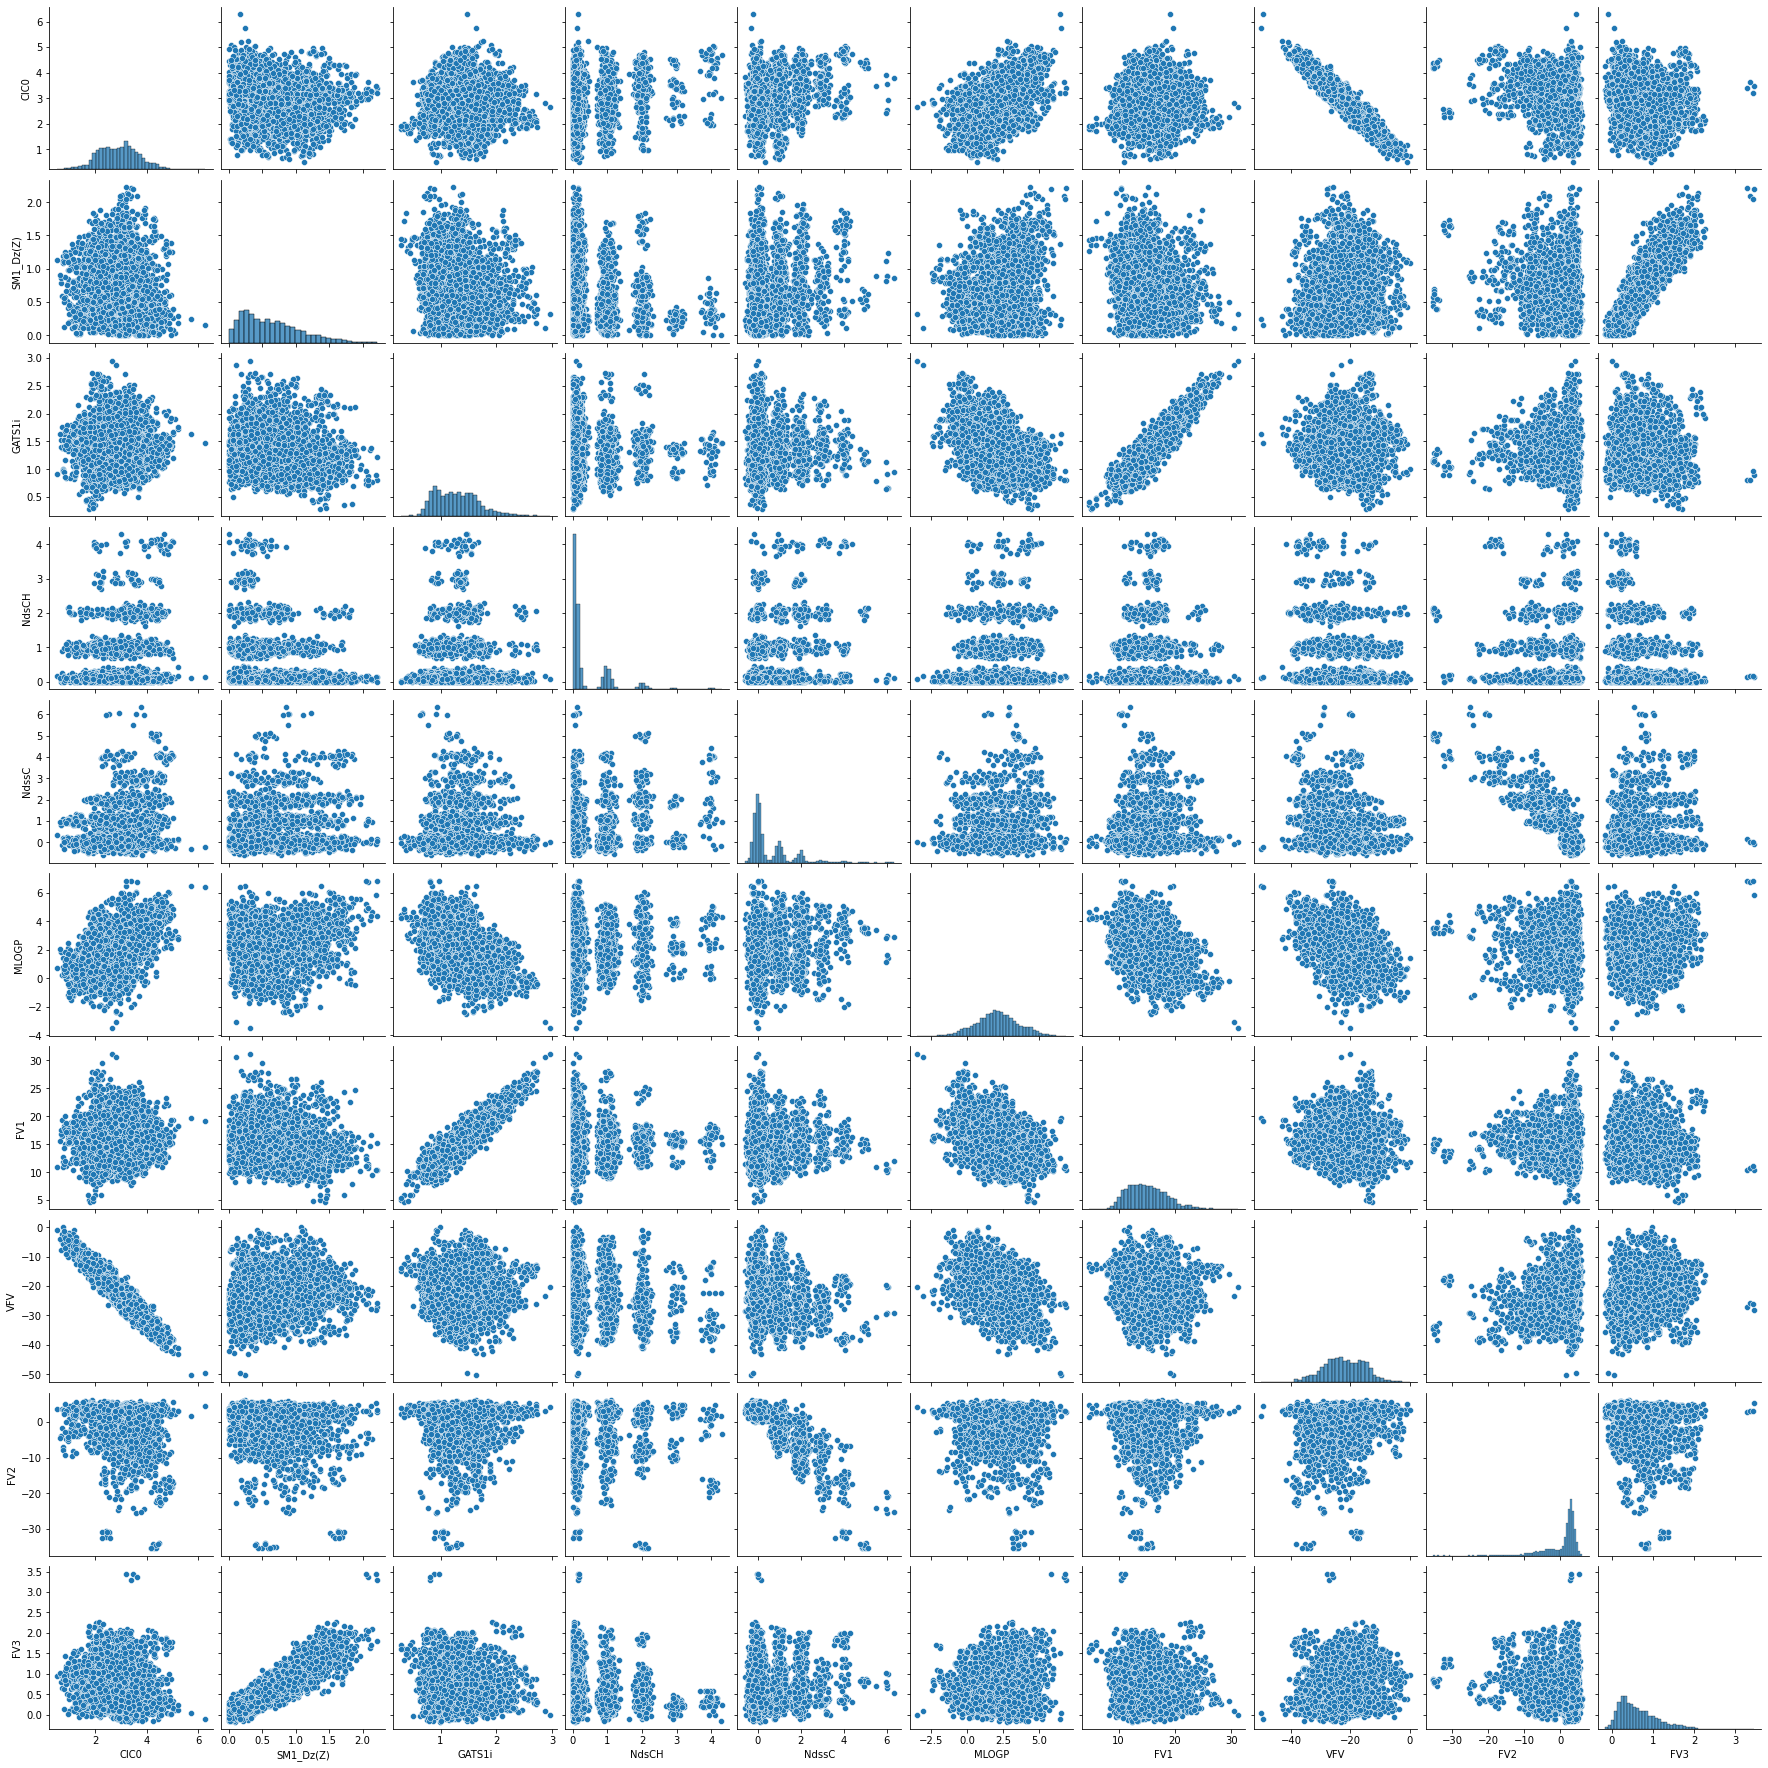

In [6]:
sns.pairplot(X_Train_Original_Reg[features],kind='scatter')
plt.show()

The figure below plots the correlation function between each predictor variable

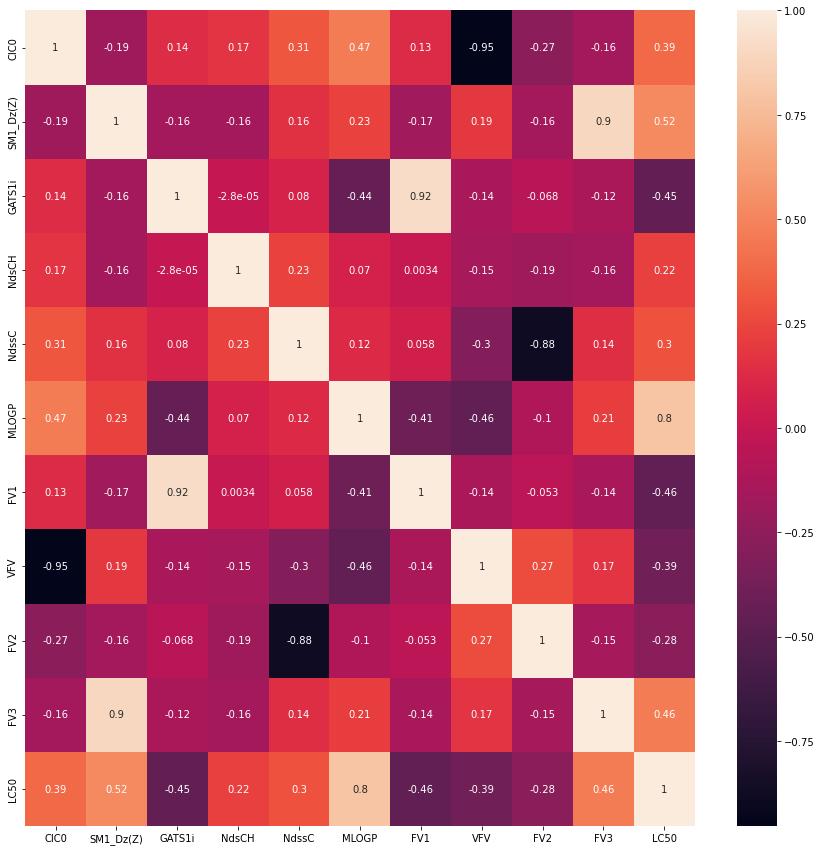

In [7]:
plt.figure(figsize = (15, 15))
sns.heatmap(chemistry_samples.corr(), annot = True)
plt.show()

Comments on Trends Observed:
- Some predictor variables show no correlation between one another an example of this is VFV and FV1, GATS1I and FV3 and GATS1I and ML0GP are examples. 
- However some show a strong correlation, for example, SM1_Dz(Z) and FV3, which shows that as SM1_Dz(Z) increases FV3 also increases, also as CICO increases VFV decreases. 
- These trends show that although a few predictors are strongly correlated most of the features are uncorrelated. 


Below a plot shows two variables 'SM1_Dz(Z)' and 'FV3' plotted against Y_Train_Reg. To see how the data looks

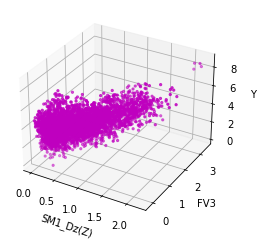

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = X_Train_Original_Reg['SM1_Dz(Z)']
y = X_Train_Original_Reg['FV3']
z = Y_Train_Reg

ax.set_xlabel('SM1_Dz(Z)')
ax.set_ylabel('FV3')
ax.set_zlabel("Y")

ax.scatter(x, y, z, marker = '.', c = 'm')
plt.show()


<a name="q11"></a>

## 1.1  [^](#outline)


Task 1.1 describes the development and testing of Linear Regression.

### Task 1.1.1 


---

In this task we use the data set, X_Train_Original_Reg, to obtain a linear regression model to predict the toxicity factor, LC50. We also report the values of the model parameters and the in-sample $R^2$ score for the data set. 

We consider a linear regression problem of the form
$$
y = \boldsymbol x^T\boldsymbol\beta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\beta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

We are interested in finding parameters $\boldsymbol\beta$ that map the inputs well to the ouputs.


We know that the parameters $\boldsymbol\beta$ found by optimizing following equation:
$$
\underset{\boldsymbol\beta}{\text{min}} \| \mathcal Y - \mathcal X \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{LS}} (\boldsymbol\beta)
$$
where $\text{L}_{\text{LS}}$ is the (ordinary) least squares loss function. The solution is
$$
\boldsymbol\beta^{*} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \ \in\mathbb{R}^D\,,
$$
where 
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$


The same estimate of $\boldsymbol\beta$ we can be obtained by maximum liklihood estimation which gives statistical interpretation of linear regression. In maximum likelihood estimation, we can find the parameters $\boldsymbol\beta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\beta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\beta)\,.
$$
We know that the maximum likelihood estimator is given by
$$
\boldsymbol\beta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$

We begin by introducing a bias parameter to our training data.

In [9]:
#Introduce bias parameter (intercept)
N, D = X_Train_Original_Reg.shape
X_Train_Reg = np.hstack([np.ones((N,1)), X_Train_Original_Reg]) # augmented training inputs of size N x (D+1)
beta = np.zeros((D+1, 1)) # new beta vector of size (D+1) x 1, parameters to be predicted

N, D = X_Test_Original_Reg.shape
X_Test_Reg = np.hstack([np.ones((N,1)), X_Test_Original_Reg]) # augmented training inputs of size N x (D+1)


Define a maximum likelihood estimator for the data.

In [10]:
def max_lik_estimate(X, y):
    """
    X : N X D matrix of training inputs
    Y: N X 1 vector of training targets
    
    returns: maximumm likelihood parameters (D X 1)
    
    The function calculates the parameter beta given X,y. 
    """

  
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y) # computes the parameters beta
    return beta_ml

Define a prediction function that utilises the parameters $\beta_{ml}$ obtained from the max_lik_estimate function to predict target variables based on predictor variables and the computed parameters. 

In [11]:
def predict_with_estimate(X, beta):
    """
    X: N x P Matrix of predictor variables
    beta: P x 1 Vector of Parameters
    
    returns: prediction of f(X); K x 1 vector
    
    The function predicts the observables based on X and beta
    
    """
   
    prediction = np.linalg.multi_dot((X, beta))
   

    return prediction 

Define a function to calculate the $R^2$ score.

In [12]:
def r_square(X,y,beta):
    """
    X: N x P Matrix of predictor variables
    beta: P x 1 Vector of Parameters
    y: N X 1 vector of actual values of the target variables
    
    The function computes the r_square score
    """
    # Compute predicted vlaues based on X and the parameters , beta
    Y_pred = predict_with_estimate(X, beta)

    # Compute the mean value of y
    Y_mean = np.mean(y)

    return (1 - (np.sum((y-Y_pred)**2))/(np.sum((y-Y_mean)**2)))

We utilise X_Train_Reg and Y_Train_Reg to obtain the parameters $\beta_{ml}$

In [13]:
# Obtain maximum likelikelihood estimate
beta_ml = max_lik_estimate(X_Train_Reg, Y_Train_Reg)

In [14]:
# The output shows the obtained parameters beta_ml
features = ['Intercept', 'CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'FV1', 'VFV', 'FV2', 'FV3']
beta_ml_pd = pd.DataFrame(np.reshape(beta_ml,(1,11)), columns = [features])
beta_ml_pd

,Intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
0,2.61638,0.044714,1.258719,-0.038009,0.363073,0.004665,0.39051,-0.074603,-0.035707,-0.015259,-0.001803


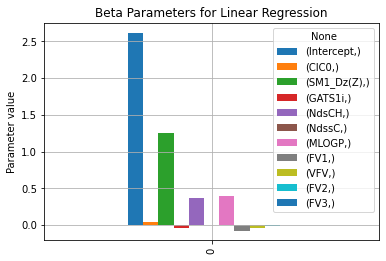

<Figure size 1080x1080 with 0 Axes>

In [15]:
# The figure shows the corresponding parameters (beta) for the predictor variables and their values.
beta_ml_pd.plot.bar()
plt.ylabel("Parameter value")
plt.grid()
plt.title(label = "Beta Parameters for Linear Regression")
plt.figure(figsize = (15, 15))
plt.show()


The figure shows that the intercept is the largest parameter whilst the red, orange, grey and yellow parameters are almost 0. This means that these parameters do not contribute significantly to the model.

Calculate the in-sample $R^2$ score, which means training the model on X_Train_Reg and comparing the predicted target values with Y_Train_Reg.

In [16]:
# In-Sample R^2 score
R_square_in_sample = r_square(X_Train_Reg,  Y_Train_Reg, beta_ml)
print("R Squared Score for In-Sample predictions = " + str(" ")+ str(R_square_in_sample))

R Squared Score for In-Sample predictions =  0.8718259975718016


### Task 1.1.2

---
In this task, we use the trained model defined in Task 1.1.1 to the test data (chesmitry_test.csv) to predict the target variable and compute the $R^2$ scope of the test set. We then compare the Training set and Test set $R^2$.

Utilise the parameters $\beta_{ml}$ that was computed in Task 1.1.1 to now obtain an $R^2$ score.

In [17]:
# Out-of-Sample R^2 score
R_square_out_sample = r_square(X_Test_Reg,  Y_Test_Reg, beta_ml) # utilise the test data in conjunction with the beta_ml defined above. 
print("R Squared Score for Out-of-Sample predictions = " + str(" ")+ str(R_square_out_sample))

R Squared Score for Out-of-Sample predictions =  0.864293336992728


To compare the In-Sample and Out-of-Sample $R^2$ score, we see the difference between the values and 1. 

In [18]:
print("In-Sample R^2 difference = " + str(" ")+ str(1 - R_square_in_sample))
print("Out-of-Sample R^2 difference = " + str(" ")+ str(1 - R_square_out_sample))

In-Sample R^2 difference =  0.12817400242819843
Out-of-Sample R^2 difference =  0.13570666300727197


The $R^2$ score defines how accurate a model is, with an $R^2$ = 1 being perfectly accurate. Comparing the In-Sample and Out-of-Sample difference we see that it is smaller for the In-Sample value and therefore the model can predict the training data better than the test set. 

<a name="q12"></a>
## 1.2 [^](#outline)

Task 1.2 describes the development and testing of Linear Regression.

#### Ridge regression

Ridge regression is an extension of linear regression with least squares loss function, including a (usually small) positive penalty term $\lambda$:
$$
\underset{\boldsymbol\beta}{\text{min}} \| \mathcal Y - \mathcal X \boldsymbol\beta \|^2 + \lambda \| \boldsymbol\beta \|^2 = \underset{\boldsymbol\beta}{\text{min}} \ \text{L}_{\text{ridge}} (\boldsymbol\beta)
$$
where $\text{L}_{\text{ridge}}$ is the ridge loss function. The solution is
$$
\boldsymbol\beta^{*}_{\text{ridge}} = (\boldsymbol X^T\boldsymbol X + \lambda I)^{-1}\boldsymbol X^T\boldsymbol y \, .
$$

### Task 1.2.1 


---
In this task, we use the data set, X_Train_Original_Reg and employ Ridge regression with T-fold (T = 5) cross-validation to tune the penalty hyper-parameter, $\lambda$ of the model. Using the average mean squared error (MSE) over all the folds we scan the penalty hyper-parameter to find its optimal value.

We utilise the computations to explain the trend of bias, variance and MSE as a function of the penalty hyper-parameter. 


Define a function similar to the one in Task 1.1.1, but takes one additional argument, the penalty term $\lambda$. 

In [19]:
def ridge_estimate(X, y, penalty):
    
    """
    X: N x D matrix of training inputs
    y: N x 1 vector of training targets/observations
    
    returns: maximum likelihood parameters (D x 1)
    """
    
    N, D = X.shape
    
    X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
    N_aug, D_aug = X_aug.shape
    I = np.identity(D_aug)
    I[0,0] = 0 # set the intercept term for shrinkage to zero to improve the shrinkage algorithm
   
    beta_ridge = np.linalg.solve(X_aug.T @ X_aug + penalty * I, X_aug.T @ y) 
    
    return beta_ridge

Define a score function, that utilises the function ridge_estimate to obtain the parameters beta_ridge. The function will then use the predict_with_estimate function, defined in Task 1.1.1,  to obtain predicted observables and then utilise the mean square error formula to obtain an MSE score.

In [20]:
def score_ridge(X_train, y_train, X_test, y_test, lam):
    """
    X_train: matrix of training inputs
    y_train: vector of training targets/observations
    
    X_test: validation / test set 
    y_test: validation set that will be comapred to the predicted values
    lam: hyper-parameter lambda,  penalty term
    
    # returns: Mean sqaure error
    """

    X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test]) # add a bias term to the test predictors
    
    beta_ridge = ridge_estimate(X_train, y_train, lam) # compute the parameters
    
    y_pred = predict_with_estimate(X_test_aug, beta_ridge) # predict observables based on obtained beta_rdige and the X_test_aug
    
    return np.sum((y_pred - y_test )**2)

Hyper-parameter tuning for $\lambda$ with T-fold cross-validation. We evaluate the accuracy of the model using held-out validation data. We do this by running T experiments (5) and in each one we use disjoint partitions for the training and accuracy samples. We then take the average of the accuracy estimated over the T experiments.

Define a function that evaluates the accuracy of the model with a given $\lambda$ by running T (5) experiments and returning the average evaluated accuracy. 

We also define a function that chooses the best $\lambda$. 

In [21]:
def cross_validation_score_rid(X_train, y_train, folds, lam):
    
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: number of T folds 
    lam: hyper-parameter lambda

    returns: average evaluated accuracy
    
    The function calculates the cross validaiton score
    
    """
  
    scores = []
    for i in range(len(folds)):
      val_indexes = folds[i] # define validation indexes
      train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes)) # define training indexes

      X_train_i = X_train[train_indexes, :] # define subset training data
      y_train_i = y_train[train_indexes] # define subset training observables


      X_val_i = X_train[val_indexes, :] # define subset validation data
      y_val_i = y_train[val_indexes]  # define subset validation observables

      score_i = score_ridge(X_train_i, y_train_i, X_val_i, y_val_i, lam)  # append the score recieved
      scores.append(score_i)
    # Return the average score
    return sum(scores) / len(scores)  

In [22]:
def choose_best_lam(X_train, y_train, folds, lam_range):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    lam_range: Array of hyper-parameter lambda values

    returns:
    k_scores = MSE score for each lambda value in lam_range
    lam_range[best_k_index] = The value of lambda that minimises the mean square error
    
    
    The function returns the best lambda value to minimise the mean square error
    """
    k_scores = np.zeros((len(lam_range),)) # create an array to hold values
  
    for i, k in enumerate(lam_range):
        k_scores[i] = cross_validation_score_rid(X_train, y_train, folds, k) # compute score using a specific lambda value
        print(f'Lambda={k}: {k_scores[i]:.4f}') # print the MSE score for each lambda
    best_k_index = np.argmin(k_scores) # get index of minimum value
    return k_scores, lam_range[best_k_index]

We utilise choose_best_lam to obtain the best hyper-parameter $\lambda$ and a list of MSE scores that will be plotted against corresponding $\lambda$ values. To do this define the fold indexes and also the $\lambda$ range. 

In [23]:
# Now we have a list of five index arrays, each correspond to one of the five folds.
folds_indexes = np.array_split(np.arange(len( Y_Train_Reg)), 5)
lam_range = np.linspace(0,1, 20)

In [24]:
# Find the best lambda value. 
lam_scores, best_lam = choose_best_lam(X_Train_Original_Reg.to_numpy() ,  Y_Train_Reg.to_numpy(), folds_indexes, lam_range)
print("The optimal hyper-parameter, lambda = " + str(best_lam)  )

Lambda=0.0: 154.5320
Lambda=0.05263157894736842: 154.5318
Lambda=0.10526315789473684: 154.5315
Lambda=0.15789473684210525: 154.5313
Lambda=0.21052631578947367: 154.5311
Lambda=0.2631578947368421: 154.5309
Lambda=0.3157894736842105: 154.5308
Lambda=0.3684210526315789: 154.5306
Lambda=0.42105263157894735: 154.5305
Lambda=0.47368421052631576: 154.5304
Lambda=0.5263157894736842: 154.5303
Lambda=0.5789473684210527: 154.5303
Lambda=0.631578947368421: 154.5302
Lambda=0.6842105263157894: 154.5302
Lambda=0.7368421052631579: 154.5302
Lambda=0.7894736842105263: 154.5302
Lambda=0.8421052631578947: 154.5303
Lambda=0.894736842105263: 154.5304
Lambda=0.9473684210526315: 154.5304
Lambda=1.0: 154.5305
The optimal hyper-parameter, lambda = 0.6842105263157894


We use the MSE scores obtained by running cross-validation across the whole range of $\lambda$ values and plot this as a function of $\lambda$

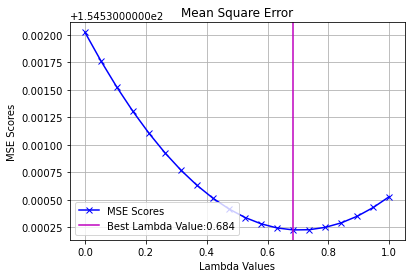

In [25]:
plt.plot(lam_range,lam_scores, marker = 'x', c = 'b', label = "MSE Scores")
plt.axvline(best_lam, c = 'm', label = ('Best Lambda Value:' + str(round(best_lam, 3))))
plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel("Lambda Values")
plt.ylabel("MSE Scores")
plt.title(label = "Mean Square Error")
plt.show()

The figure above shows how the MSE score changes as a function of the Lambda values. The figure shows as $\lambda$ goes from 0 to 1.0, the MSE scores decrease until they reach a minimum value (best value) at $\lambda$ = 0.684 and then the scores rise again. 

This Mean Square error plot shows that the Ridge Regression algorithm is the best model to minimise both Bias and Variance as it actively aims to minimise the MSE error.  

### Task 1.2.2


---
In this section, we fix the penalty hyper-parameter to the best $\lambda$ calculated in Task 1.2.1 and retrain the model on the entire data set X_Train_Original_Reg. We then obtain the In-sample $R^2$ when applied to X_Train_Original_Reg (chemistry_samples) and then compare to the Out-of-Sample $R^2$ on the test set X_Test_Original_Reg (chemistry_test).

We now retrain the Ridge regresssion model using the optimal hyper-parameter value, best_lam found in 1.2.1 and obtain the paramters beta_ridge_model shown in the table. 

In [26]:
beta_ridge_model = ridge_estimate(X_Train_Original_Reg, Y_Train_Reg, best_lam) # obtain parameters

In [27]:
# The output shows the obtained parameters beta_ml
features = ['Intercept', 'CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'FV1', 'VFV', 'FV2', 'FV3']
beta_ridge_model_pd = pd.DataFrame(np.reshape(beta_ridge_model,(1,11)), columns = [features])
beta_ridge_model_pd

,Intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
0,2.618158,0.044346,1.252502,-0.037808,0.362805,0.004945,0.39065,-0.074636,-0.03571,-0.015248,0.003046


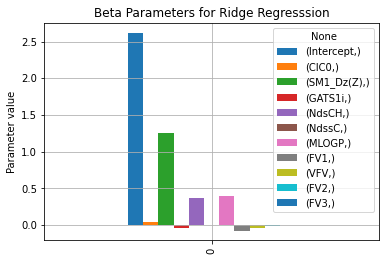

<Figure size 1080x1080 with 0 Axes>

In [28]:
# The figure shows the corresponding parameters (beta) for the predictor variables and their values.
beta_ridge_model_pd.plot.bar()
plt.ylabel("Parameter value")
plt.grid()
plt.title(label = "Beta Parameters for Ridge Regresssion")
plt.figure(figsize = (15, 15))
plt.show()

We utilise the parameters from beta ridge model to obtain both an In-Sample and Out-of-Samples $R^2$ score. 

In [29]:
# In-of-Sample R^2 score
R_square_in_sample_rid = r_square(X_Train_Reg,  Y_Train_Reg, beta_ridge_model) # utilise the test data in conjunction with the beta_ml defined above. 
print("R Squared Score for In-Sample predictions = " + str(" ")+ str(R_square_in_sample_rid))

# Out-of-Sample R^2 score
R_square_out_sample_rid = r_square(X_Test_Reg,  Y_Test_Reg, beta_ridge_model) # utilise the test data in conjunction with the beta_ml defined above. 
print("R Squared Score for Out-of-Sample predictions = " + str(" ")+ str(R_square_out_sample_rid))

# Obtain difference between R^2 score and 1
print("In-Sample R^2 difference = " + str(" ")+ str(1 - R_square_in_sample_rid))
print("Out-of-Sample R^2 difference = " + str(" ")+ str(1 - R_square_out_sample_rid))

R Squared Score for In-Sample predictions =  0.8718251014634909
R Squared Score for Out-of-Sample predictions =  0.8642796534380606
In-Sample R^2 difference =  0.1281748985365091
Out-of-Sample R^2 difference =  0.13572034656193943


We calculate the percentage difference between the $R^2$ scores obtained from Ridge in relation to Linear Regression

In [30]:
print("In-Sample R^2 percentage difference = " + str(" ")+ str(abs(1 - R_square_in_sample_rid/R_square_in_sample)*100) + str("%"))
print("Out-of-Sample R^2 percentage difference = " + str(" ")+ str(abs(1 - R_square_out_sample_rid/R_square_out_sample)*100) + str("%"))

In-Sample R^2 percentage difference =  0.00010278522470930085%
Out-of-Sample R^2 percentage difference =  0.0015832072378429984%


Comparing the In-Sample and Out-of-Sample $R^2$ score both linear regression and Ridge regression shows that the values are almost identical, with a percentage difference of 0.0001% (In-Sample) and 0.0015% (Out-of-Sample).

The parameters (beta values) are almost identical and are shown together in the data frame below.  

In [475]:
# Below shows the table of data 
data = {'Parameters':features, 'Linear Reg':beta_ml, 'Ridge Reg' : beta_ridge_model}
sum_frame = pd.DataFrame(data)
sum_frame

,Parameters,Linear Reg,Ridge Reg
0,Intercept,2.616380,2.618158
1,CIC0,0.044714,0.044346
2,SM1_Dz(Z),1.258719,1.252502
3,GATS1i,-0.038009,-0.037808
4,NdsCH,0.363073,0.362805
5,NdssC,0.004665,0.004945
6,MLOGP,0.390510,0.390650
7,FV1,-0.074603,-0.074636
8,VFV,-0.035707,-0.035710
9,FV2,-0.015259,-0.015248


<a name="q13"></a>

## 1.3 [^](#outline)

In Task 1.3 we implement a relaxation of Lasso optimisation using the gradient decent method. 

We consider a smooth verssion of Lassso in which the penalty term of the cost function is approximated through smooth functions L$_c$ (huber functions) so that it is differentialble. The cost function to be optimised is



$$
L_{Lasso(\beta)} =  \frac{1}{N}\| \mathcal Y - \mathcal X \boldsymbol\beta \| + \lambda \sum_{i}^P L_c(\beta_{i})
$$

$$
\
  L_c({\beta}) = \left.
  \begin{cases}
    \frac{1}{2}\beta^2, & \text{for }  |\beta| \leq c \\
    c(|\beta| -  \frac{1}{2}c), & \text otherwsie \\
  \end{cases}
  \right\} 
\
$$

where p is the number of predictors and N is the number of samples. Here $\lambda$ (lambda) is the penalty hyper-parameter and c regulates the 'sharpness' of the Huber functions. 

In order to implement gradient decent we need to utilise the gradient of $L_{Lasso(\beta)}$ which is given by:

$$
\triangledown L_{Lasso(\beta)} =  -\frac{2}{N}[X^Ty - (X^TX)\beta] + \triangledown L_c({\beta})
$$
$$
\
  \triangledown L_c({\beta}) = \left.
  \begin{cases}
    \beta, & \text{for }  |\beta| \leq c \\
    c*sign(\beta), & \text otherwsie \\
  \end{cases}
  \right\} 
\
$$

During the task we fix c = 0.001. 

With these equations, we can conduct the actual optimisation and update the $\boldsymbol \beta$ with a learning rate $\alpha$ (step_size). The beta is then updated via the following equaiton:
$$
\boldsymbol \beta = \boldsymbol \beta - \alpha \ \frac{\partial \mathcal L}{\partial \boldsymbol \beta}
$$
where $ \frac{\partial \mathcal L}{\partial \boldsymbol \beta}$ is given by $\triangledown L_{Lasso(\beta)}$. 


### Task 1.3.1 and 1.3.2

---
In this section, we create the functions required to perform a relaxation of the Lasso optimisation based on the equations above. We employ this relaxed Lasso-Huber regression with a 5-fold cross-validation with the folds described in Task 1.2.1 (based on chemistry_samples) to conduct a grid search to find the optimal penalty hyper-parameter $\lambda$. We then obtain the In-Sample and Out-of-Sample $R^2$ score with the optimal hyper-parameter (as in task 1.2.2).



We define huber and grad_huber functions, based on the equations above which will be used in the gradient descent aspect of the algorithm. 

In [32]:
def huber(beta, c=1e-3):
    """
    beta: vector of parameters
    c: sharpness coefficient
    
    return: An array of values
    
    This function calculates and returns an array of values 
    based on the huber equation
    
    """
    return np.array([(1/2)*b**2 if abs(b) <= c else c*(abs(b) - (1/2)*c) for b in beta])
  
def grad_huber(beta, c=1e-3):
    """
    beta: vector of parameters
    c: sharpness coefficient

    return: An array of values

    This function calculates and returns an array of values based on the differential 
    of the huber equation

    """
    
    return np.array([b if abs(b) <= c else c*np.sign(b) for b in beta])

We define a function that performs gradient decent, utilising grad_huber and huber functions. 

In [33]:
def minimize_ls_huber(X, y, lambd, n_iters=10000, step_size=1e-3):
    """
    X: N x P Matrix of predictor variables
    y: N x 1 Matrix of observables 
    lambd: Value of the hyper-parameter 
    n_iters: number of iterations to perform for gradient descent
    step_size: size of the step when performing gradient descent
    
    
    returns: 
    beta: A vector of parameters 
    
    The function obtains a vector of parameters , using Lasso optimisation with 
    gradient descent. 
    
    """
    
    n, p = X.shape # obtain the shape of X
    
    X = np.hstack([np.ones((n,1)), X]) # Introduce the bias (offset) parameter
   
    XX = X.T @ X / n # defining calculations 
    Xy = X.T @ y / n
    
    # Initialise lambda array and set the intercept lambda to zero so that the intercept
    # parameter beta is not changed by the grad_huber and therefore shrinkage functionality is improved
    lambd = lambd * np.ones(shape=(p + 1,) )
    lambd[0] = 0
    
    # next line: initialise betas
    beta = np.zeros(shape=(p + 1,))

    # gradient descent
    for i in range(n_iters):
        grad = -2*(Xy - XX @ beta) + lambd * (grad_huber(beta)) # calculate the gradient array
        # next line: gradient descent update
        beta = beta - step_size * grad
      
    return beta

Define a score function for Lasso optimisation that utilises the function minimize_ls_huber to obtain the parameters beta_lasso. The function will then use the predict_with_estimate function, defined in Task 1.1.1,  to obtain predicted observables and then utilise the mean square error formula to obtain an MSE score.

In [34]:
def score_lasso(X_train, y_train, X_test, y_test, lamd):
    """
    X_train: matrix of training inputs
    y_train: vector of training targets/observations
    
    X_test: validation / test set 
    y_test: validation set that will be comapred to the predicted values
    lam: hyper-parameter lambda,  penalty term
    
    returns: Mean sqaure error
    
    The function returns a score based on the Mean Sqaure Error by predicting
    values using the lasso model and comparing it to actual data. 
    """

    X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test]) # add a bias term to the test predictors
    beta_lasso = minimize_ls_huber(X_train, y_train, lamd, n_iters=10000, step_size=1e-3)
    
    
    y_pred = predict_with_estimate(X_test_aug, beta_lasso)
    
    return np.mean((y_pred - y_test )**2)

Define a function that evaluates the accuracy of the model with a given $\lambda$ by running T (5) experiments and returning the average evaluated accuracy. 

We also define a function that chooses the best $\lambda$. 

In [35]:
def cross_validation_score_las(X_train, y_train, folds, lam):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: number of T folds 
    lam: hyper-parameter lambda

    returns: average evaluated accuracy

    The function calculates the cross validaiton score for Lasso optimisation

    """
  
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]


        X_val_i = X_train[val_indexes, :] 
        y_val_i = y_train[val_indexes] 

        score_i = score_lasso(X_train_i, y_train_i, X_val_i, y_val_i, lam) 
        scores.append(score_i)
    # Return the average score 
    return np.sum(scores)/ float(len(scores))

In [36]:
def choose_best_lam_las(X_train, y_train, folds, lam_range):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    lam_range: Array of hyper-parameter lambda values

    returns:
    k_scores = MSE score for each lambda value in lam_range
    lam_range[best_k_index] = The value of lambda that minimises the mean square error
    
    
    The function returns the best lambda value to minimise the mean square error using lasso optimisation
    """
    k_scores = np.zeros((len(lam_range),)) # create an array to hold values
  
    for i, k in enumerate(lam_range):
        k_scores[i] = cross_validation_score_las(X_train, y_train, folds, k) # compute score using a specific lambda value
        print(f'Lambda={k}: {k_scores[i]:.4f}') # print the MSE score for each lambda
    best_k_index = np.argmin(k_scores) # get index of minimum value
    return k_scores, lam_range[best_k_index]

We utilise choose_best_lam_las to obtain the best hyper-parameter $\lambda$ and a list of MSE scores that will be plotted against corresponding $\lambda$ values. To do this define the $\lambda$ range to be used in lasso optimisation.  

In [37]:
lam_las_range = np.linspace(1,25, 26)

In [38]:
# Find the best lambda value. 
# We pick 10,000 iterations as it is enough samples to reach the minimum
# We pick step_size to be 1e-3 because it allows us to reach the local minimum efficiecntly. 
lam_scores_las, best_lam_las = choose_best_lam_las(X_Train_Original_Reg.to_numpy() ,  Y_Train_Reg.to_numpy(), folds_indexes, lam_las_range)
print("The optimal hyper-parameter, lambda = " + str(best_lam_las)  )

Lambda=1.0: 0.2476
Lambda=1.96: 0.2474
Lambda=2.92: 0.2473
Lambda=3.88: 0.2472
Lambda=4.84: 0.2471
Lambda=5.8: 0.2470
Lambda=6.76: 0.2469
Lambda=7.72: 0.2469
Lambda=8.68: 0.2468
Lambda=9.64: 0.2468
Lambda=10.6: 0.2467
Lambda=11.559999999999999: 0.2467
Lambda=12.52: 0.2467
Lambda=13.48: 0.2466
Lambda=14.44: 0.2466
Lambda=15.399999999999999: 0.2466
Lambda=16.36: 0.2466
Lambda=17.32: 0.2467
Lambda=18.28: 0.2467
Lambda=19.24: 0.2468
Lambda=20.2: 0.2469
Lambda=21.16: 0.2469
Lambda=22.119999999999997: 0.2470
Lambda=23.08: 0.2471
Lambda=24.04: 0.2472
Lambda=25.0: 0.2473
The optimal hyper-parameter, lambda = 14.44


We use the MSE scores obtained by running cross validaiton across the whole range of $\lambda$ values and plot this as a function of $\lambda$

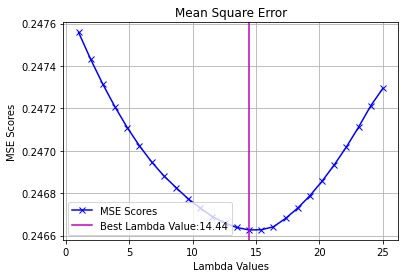

In [39]:
plt.plot(lam_las_range,lam_scores_las, marker = 'x', c = 'b', label = "MSE Scores")
plt.axvline(best_lam_las, c = 'm', label = ('Best Lambda Value:' + str(round(best_lam_las, 3))))
plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel("Lambda Values")
plt.ylabel("MSE Scores")
plt.title(label = "Mean Square Error")
plt.show()

The figure above shows how the MSE score changes as a function of the Lambda values for Lasso Optimisation. The figure shows as $\lambda$ goes from 0 to 25, the MSE scores decrease until they reach a minimum value (best value) at $\lambda$ = 14.44 and then the scores rise again. 

We now retrain the Lasso regression model using the optimal hyper-parameter value, best_lam_las found above and obtain the parameters beta_lasso_model shown in the table.  

In [40]:
beta_lasso_model = minimize_ls_huber(X_Train_Original_Reg, Y_Train_Reg,best_lam_las, n_iters=10000, step_size=1e-3) # obtain parameters

In [41]:
# The output shows the obtained parameters beta_ml
features = ['Intercept', 'CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'FV1', 'VFV', 'FV2', 'FV3']
beta_lasso_model_pd = pd.DataFrame(np.reshape(beta_lasso_model,(1,11)), columns = [features])
beta_lasso_model_pd

,Intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3
0,1.157117,0.282567,0.946892,-0.085296,0.380286,0.038201,0.442656,-0.016687,-0.021316,0.000539,0.463725


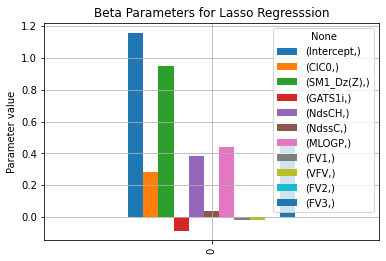

<Figure size 1080x1080 with 0 Axes>

In [42]:
# The figure shows the corresponding parameters (beta) for the predictor variables and their values.
beta_lasso_model_pd.plot.bar()
plt.ylabel("Parameter value")
plt.grid()
plt.title(label = "Beta Parameters for Lasso Regresssion")
plt.figure(figsize = (15, 15))
plt.show()

Utilising lasso regression changes the beta parameters, with a greater proportion of the parameters being non negligible when compared to linear regression. 

We utilise the parameters from beta ridge model to obtain both an In-Sample and Out-of-Samples $R^2$ score. 

In [43]:
# In-of-Sample R^2 score
R_square_in_sample_las = r_square(X_Train_Reg,  Y_Train_Reg, beta_lasso_model) # utilise the test data in conjunction with the beta_ml defined above. 
print("R Squared Score for In-Sample predictions = " + str(" ")+ str(R_square_in_sample_las))

# Out-of-Sample R^2 score
R_square_out_sample_las = r_square(X_Test_Reg,  Y_Test_Reg, beta_lasso_model) # utilise the test data in conjunction with the beta_ml defined above. 
print("R Squared Score for Out-of-Sample predictions = " + str(" ")+ str(R_square_out_sample_las))

# Obtain difference between R^2 score and 1
print("In-Sample R^2 difference = " + str(" ")+ str(1 - R_square_in_sample_las))
print("Out-of-Sample R^2 difference = " + str(" ")+ str(1 - R_square_out_sample_las))

R Squared Score for In-Sample predictions =  0.8315256779806832
R Squared Score for Out-of-Sample predictions =  0.8235335442585912
In-Sample R^2 difference =  0.16847432201931678
Out-of-Sample R^2 difference =  0.17646645574140885


### 1.3.3

---
In this section, we discuss the differences in the regression coefficients obtained through Lasso (Task 1.3) and Ridge (Task 1.2) regressions. 

In [44]:
# Below shows 
data = {'Parameters':features, 'Ridge Reg' : beta_ridge_model, 'Lasso Reg' :beta_lasso_model, 'Percentage Diff' : abs(1 - beta_lasso_model/beta_ridge_model)*100  }
sum_frame = pd.DataFrame(data)
sum_frame

,Parameters,Ridge Reg,Lasso Reg,Percentage Diff
0,Intercept,2.618158,1.157117,55.804155
1,CIC0,0.044346,0.282567,537.191855
2,SM1_Dz(Z),1.252502,0.946892,24.399926
3,GATS1i,-0.037808,-0.085296,125.603420
4,NdsCH,0.362805,0.380286,4.818312
5,NdssC,0.004945,0.038201,672.544937
6,MLOGP,0.390650,0.442656,13.312635
7,FV1,-0.074636,-0.016687,77.642705
8,VFV,-0.035710,-0.021316,40.306986
9,FV2,-0.015248,0.000539,103.532892


The parameters (beta values) in the table above shows that there is a significant difference between Ridge Regression parameters and Lasso Regression. With percentage difference being significantly higher than those observed when comparing Linear Regression with Ridge Regression. 

The $R^2$ scores of Lasso Regression compared to Ridge Regression shows that Ridge has a greater score therefore it performs much better than Lasso Regression. 

<a name="task-2"></a>

# Task 2: Classification [^](#outline)

Task 2 deals with the classification of breast tumour samples as 'benign' or 'malignant' based on 30 features. The target variable is the 'DIAGNOSIS' column.

In Task 2 three different models are used for classification purposes; kNN classifier, Random forest and Support vector machine (SVM) and will be used on tumour_samples.csv (training data), tumour_test.csv (test data) and tumour_samples_bal.csv (balanced data). 


### Data Loading


---

In this section we import the data tumour_samples.csv and tumour_test.csv using the pandas module and perform some checks. 

In [45]:
# load samples to train the model as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv')
# load test set to validate the implementation of the model 
tumour_test = pd.read_csv('tumour_test.csv')

In [46]:
# Checking the first five rows of the dataset
tumour_samples.head()

,Unnamed: 0,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,0,10.855170,15.248290,69.167041,359.534878,0.105488,0.080200,0.066410,0.034194,0.182796,...,18.984557,81.443134,466.879302,0.149080,0.200185,0.205695,0.111592,0.335999,0.093477,B
1,1,10.068958,15.532758,66.130635,330.040665,0.099813,0.109540,0.057583,0.023322,0.195650,...,22.840293,82.133171,473.367822,0.125478,0.330466,0.283304,0.088021,0.312882,0.096158,B
2,2,12.271409,18.100314,78.195610,421.537832,0.105147,0.095315,0.043317,0.031539,0.188801,...,26.365608,84.598334,620.586067,0.146766,0.118707,0.147900,0.050402,0.291805,0.069556,B
3,3,10.531733,18.452486,67.227069,340.063033,0.086041,0.049961,0.049709,0.011046,0.203093,...,24.385385,73.296855,429.675600,0.100060,0.143683,0.177225,0.028111,0.287749,0.073174,B
4,4,12.367686,14.399191,80.643814,460.849710,0.106410,0.101420,0.020806,0.021990,0.195326,...,19.614305,89.910502,472.323112,0.138135,0.276127,0.151098,0.074396,0.345258,0.095830,B


We immediately observe that the data consists of 10 descriptors and that the data is clean with no missing values. We notice that some values are an order of magnitude greater than others and we explore standardising the data to see if the accuracy is affected.  

We now define the training features and target variables. 

In [47]:
# Defining training set
X_Train_Original_class = tumour_samples.iloc[:,1:31] 

Y_Train_class = tumour_samples['DIAGNOSIS'] # y training samples
Y_Train_class = Y_Train_class.replace({'B':0,'M':1}) # convert benign and malignant tumours to bolean

X_Test_Original_class = tumour_test.iloc[:,1:31] # define test set

Y_Test_class = tumour_test['DIAGNOSIS']
Y_Test_class= Y_Test_class.replace({'B':0,'M':1}) # convert benign and malignant tumours to bolean


In [48]:
X_Train_Original_class.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_radius,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension
0,10.855170,15.248290,69.167041,359.534878,0.105488,0.080200,0.066410,0.034194,0.182796,0.066968,...,11.344586,18.984557,81.443134,466.879302,0.149080,0.200185,0.205695,0.111592,0.335999,0.093477
1,10.068958,15.532758,66.130635,330.040665,0.099813,0.109540,0.057583,0.023322,0.195650,0.069572,...,11.144049,22.840293,82.133171,473.367822,0.125478,0.330466,0.283304,0.088021,0.312882,0.096158
2,12.271409,18.100314,78.195610,421.537832,0.105147,0.095315,0.043317,0.031539,0.188801,0.063341,...,13.880914,26.365608,84.598334,620.586067,0.146766,0.118707,0.147900,0.050402,0.291805,0.069556
3,10.531733,18.452486,67.227069,340.063033,0.086041,0.049961,0.049709,0.011046,0.203093,0.064948,...,10.820798,24.385385,73.296855,429.675600,0.100060,0.143683,0.177225,0.028111,0.287749,0.073174
4,12.367686,14.399191,80.643814,460.849710,0.106410,0.101420,0.020806,0.021990,0.195326,0.064605,...,12.998422,19.614305,89.910502,472.323112,0.138135,0.276127,0.151098,0.074396,0.345258,0.095830


In [49]:
Y_Train_class.head()

0    0
1    0
2    0
3    0
4    0
Name: DIAGNOSIS, dtype: int64

To visualise the observables from trianing and test data, we plot them below. The plots show that the training data has a lower proportion of 1's ('M') than the test data.  

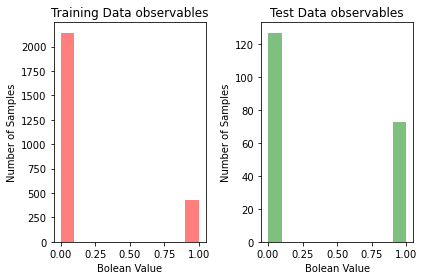

In [50]:
fig, ax = plt.subplots(1,2)
ax[0].hist(Y_Train_class, alpha = 0.5, color = 'r')
ax[0].set_xlabel("Bolean Value")
ax[0].set_ylabel("Number of Samples")
ax[0].set_title("Training Data observables")

ax[1].hist(Y_Test_class, alpha = 0.5, color = 'g')
ax[1].set_xlabel("Bolean Value")
ax[1].set_ylabel("Number of Samples")
ax[1].set_title("Test Data observables")
fig.tight_layout()

plt.show()

The figure below shows a correlation function plot between each predictor variable in turmour_samples.

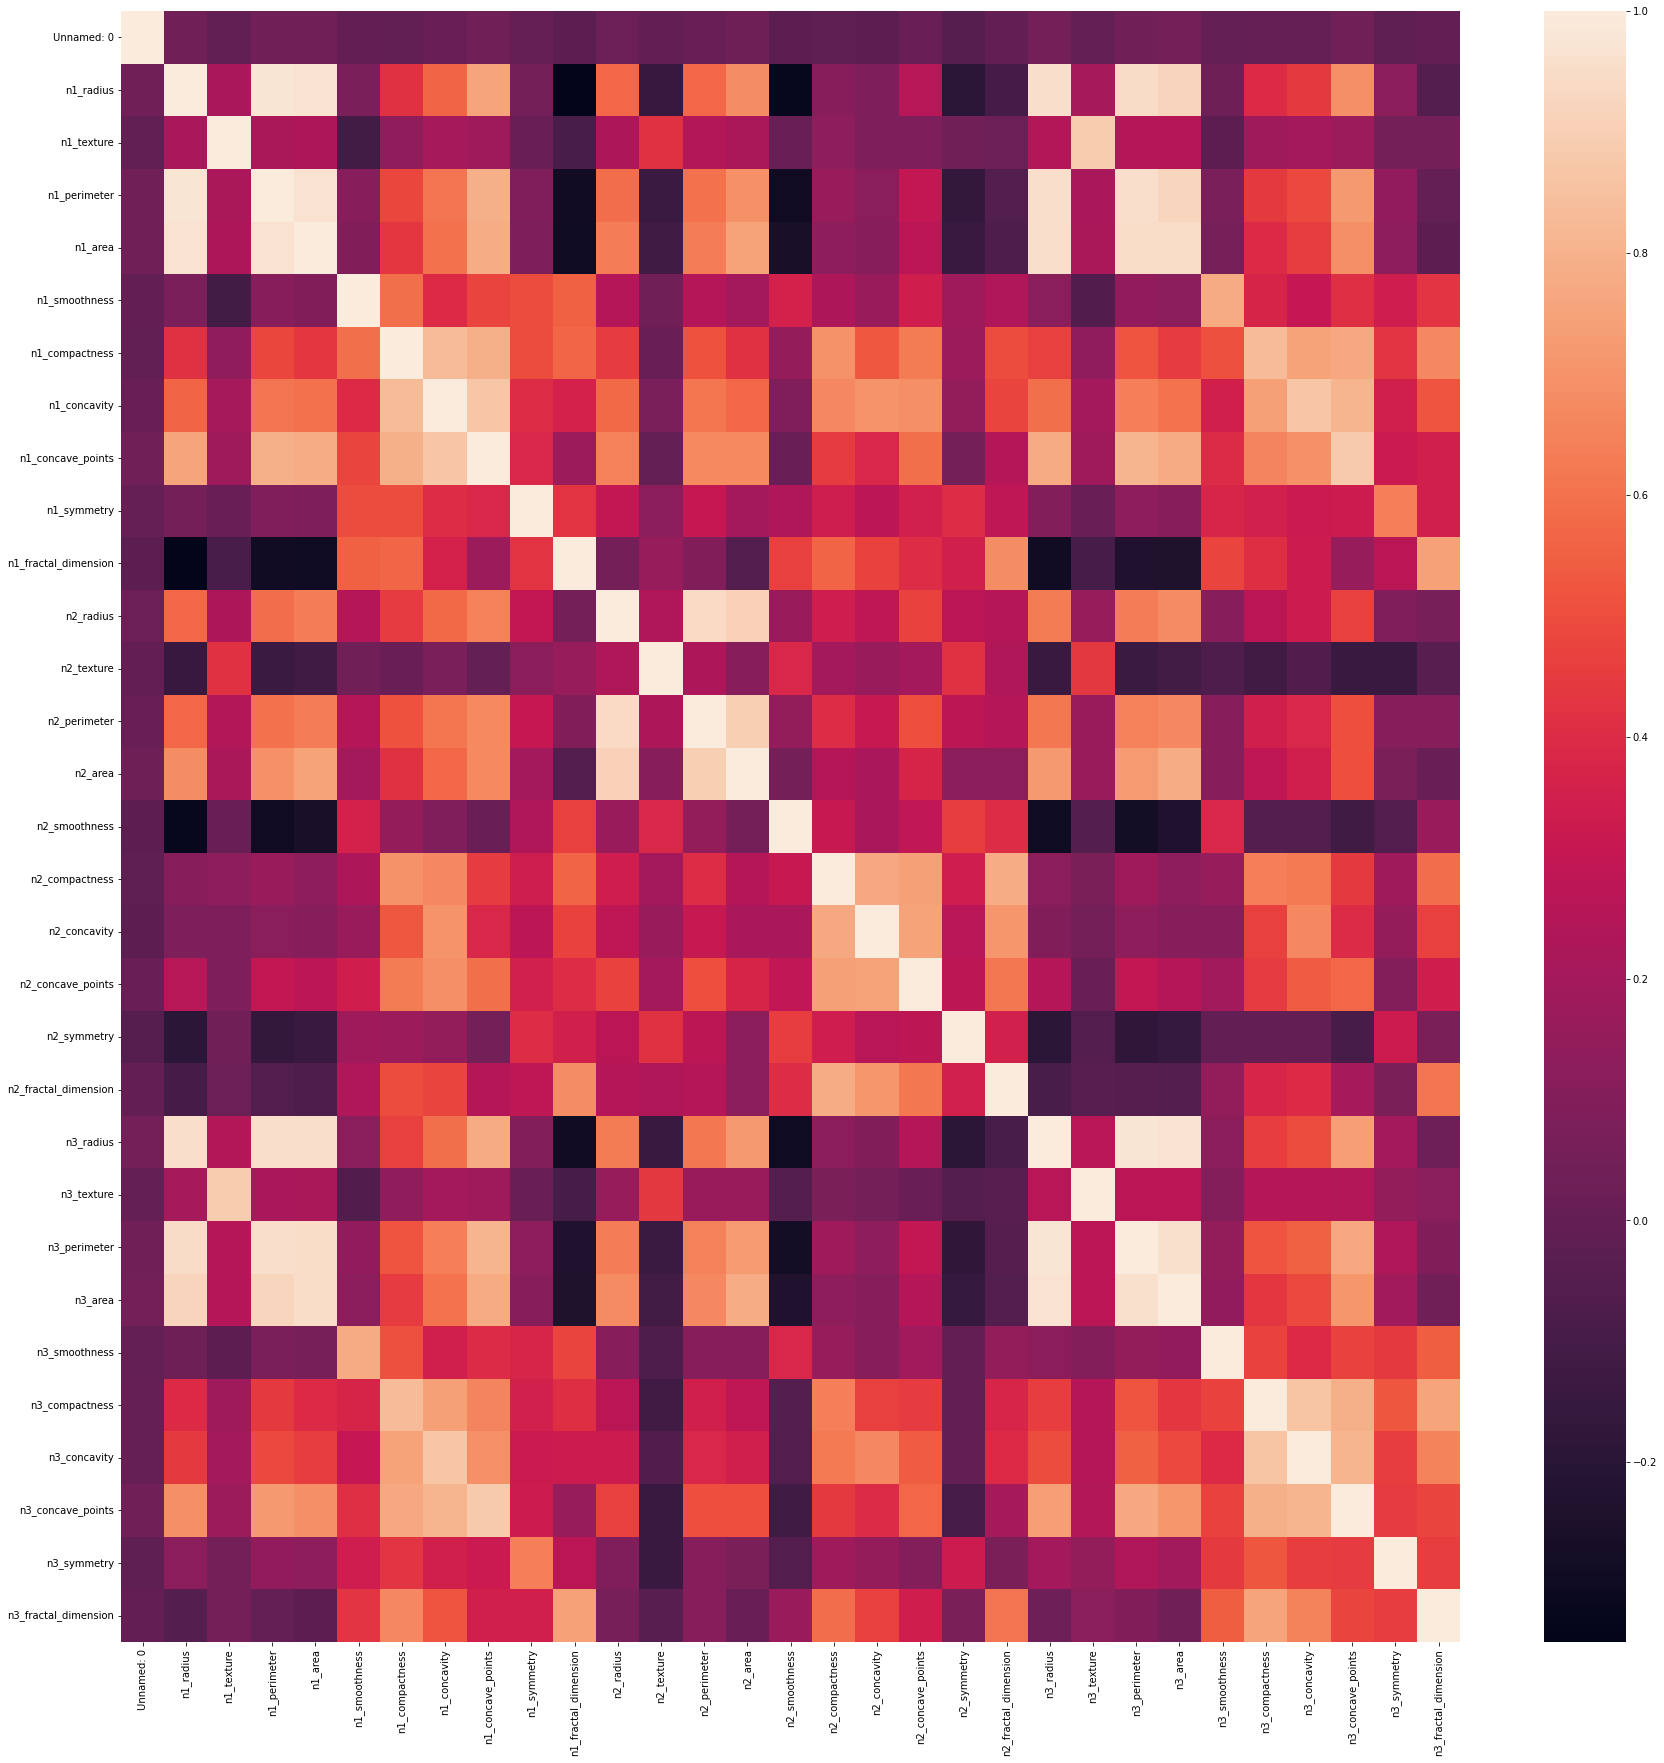

In [51]:
plt.figure(figsize = (30, 30))
sns.heatmap(tumour_samples.corr(), annot = False)
plt.show()

The correlation plot shown above indicates that some values have a strong correlation with each other whilst others have no correlation. 
- Strong correlation occurs between n1_radius and n1_area for example. This trend occurs throughout the different predictor variables where radius, area and perimeter have a strong correlation. 
- The strong correlation means that in further investigation feature selection can take place, where removing one of the strongly correlating features may improve the efficiency in training the model. 

<a name="q13"></a>

## 2.1 [^](#outline)

Task 2.1 describes the development and implementation of a kNN classifier.  

### Task 2.1.1 


---
In this task we use the data set, X_Train_Original_class, to train a k-Nearest Neighbour (kNN) classifier. We utilise grid search with 5-fold cross-validation to find an optimal value of the hyper-parameter k.  

kNN algorithm is based on computing distances between data points. The kNN classifier finds the k nearest points closest to x and assigns the new point x to the majority of the class of the k nearest points. 

To do this we use Euclidean distances and implement the following equation for Euclidean distance d, 
 

$$
d(\boldsymbol p, \boldsymbol q) = \sqrt{\sum_{i=1}^D{(q_i-p_i)^2}} \, ,
$$
where $\boldsymbol p$ and $\boldsymbol q$ are the two points in our $D$-dimensional Euclidean space.

In [52]:
def euclidian_distance(p, q):
    """
    p: point in D-dimensional Euclidean space
    q: point in D-dimensional Euclidean space
    
    returns: the euclidean distance between p and q
    """
    return np.sqrt(np.sum((p-q)**2, axis=1))

The data for the predictor variables show that some points are orders of magnitude greater than others and therefore we should implement a standardise function to reduce this discrepancy.  

In [53]:
def standardise(X):
    """
    X: Array to standarise
    
    returns: standardised array
    """
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_std = (X - mu) / sigma 
    return X_std

We define a function k_neighbours, which will find the k nearest neighbours in our train set for every test data point. 

In [54]:
def k_neighbours(X_train, X_test, k, return_distance=False):
    """
    X_train: N X P Matrix of test inputs
    X_test: D X B Matrix of values (Can also have same dimentions as X_train)
    k: hyper-parameter that defines how many of the closest neighbours do we want to use to evaluate
    
    returns: an array of indicies of the nearest neighours
    
    This function finds the k nearest neighbours in our train set for every test data point
    """
    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_test in X_test to all points in X_train 
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test] 

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)
  
    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
  
    return np.array(neigh_ind)

Define a prediction function that utilises the k nearest neighbours found in k_neighbours and then determines how any point in the test set is classified.

In [55]:
def predict_kNN(X_train, y_train, X_test, k):
    """
    X_train : N X D matrix of training inputs
    Y_train : N X 1 vector of training targets
    X_test: D x B Matrix of test inputs
    k: hyper-parameter that defines how many of the closest neighbours do we want to use to evaluate
    
    returns: An array of predicted target variables
    
    The function determines how any point in a test set is classifed based on a training set. 
    """
    
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k= k)

    # count number of occurences of label with np.bincount and choose the label that has most with np.argmax
    y_pred = np.array([np.argmax(np.bincount(y_train[neighbour])) for neighbour in neighbours])


    return y_pred

Define a score function, that utilises the function predict_kNN to obtain predicted target variables. The function will then compare the predicted target variables to the known target variables and out an accuracy. 

In [56]:
def score_kNN(X_train, y_train, X_test, y_test, k):
    """
    X_train : N X D matrix of training inputs
    y_train : N X 1 vector of training targets
    X_test: D x B Matrix of test inputs
    y_test: D x 1 vector of test targets
    k: hyper-parameter that defines how many of the closest neighbours do we want to use to evaluate
    
    returns: An value that correspondss to the accuracy 
    
    The function determines the mean accuracy by counting how many points have been classified correctly. 
    """

    y_pred = predict_kNN(X_train, y_train, X_test, k) # predict y values (target variables) based on the model
    return float(sum(y_pred==y_test))/ float(len(y_test))

Hyper-parameter tuning for k with T-fold cross-validation. We evaluate the accuracy of the model using held-out validation data. We do this by running T experiments (5) and in each one we use disjoint partitions for the training and accuracy samples. We then take the average of the accuracy estimated over the T experiments.

Define a function that evaluates the accuracy of the model with a given k by running T (5) experiments and returning the average evaluated accuracy. 

We also define a function that chooses the best k. 

In [57]:
def cross_validation_score_kNN(X_train, y_train, folds, k):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: number of T folds 
    k: hyper-parameter k

    returns: average evaluated accuracy
    
    The function calculates the cross validaiton score for kNN classifier
    
    """
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]
        
        X_val_i = X_train[val_indexes, :] 
        y_val_i = y_train[val_indexes]

        score_i = score_kNN(X_train_i, y_train_i, X_val_i, y_val_i, k=k)
        scores.append(score_i)

    # Return the average score for validation
    return sum(scores) / len(scores) 

In [58]:
def choose_best_k_kNN(X_train, y_train, folds, k_range):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    k_range: Array of hyper-parameter lambda values

    returns:
    k_scores = Accuracy score for each lambda value in k_range
    k_range[best_k_index] = The value of lambda that minimises the mean square error
    
    
    The function returns the best k value to maximise the accuracy.
    """
    
    k_scores = np.zeros((len(k_range),)) # create an array to hold values

    for i, k in enumerate(k_range): # iterate through indicies and values in k_range
        k_scores[i] = cross_validation_score_kNN(X_train, y_train, folds, k) # utilise cross validation method
        print(f'CV_ACC@k={k}: {k_scores[i]:.5f}')

    best_k_index = np.argmax(k_scores) # get index of maximum value
    return k_scores, k_range[best_k_index]

We utilise choose_best_k_kNN to obtain the best hyper-parameter k and a list of accuracy scores that will be plotted against corresponding k values. To do this we define the fold indexes and also the k range. 

In [59]:
# Now we have a list of five index arrays, each correspond to one of the five folds.
folds_indexes_class = np.array_split(np.arange(len(Y_Train_class)), 5)
k_range_kNN = np.arange(1, 31)

We also want to standardise both the training and test dataset using the standardise function. 

In [60]:
# Standarise the data
X_Train_KNN = standardise(X_Train_Original_class)
X_Test_KNN = standardise(X_Test_Original_class)

In [61]:
# Find the best k value based on the validation subset defined in cross-validation
k_scores_kNN, best_k_kNN = choose_best_k_kNN(X_Train_KNN.to_numpy() ,Y_Train_class.to_numpy() , folds_indexes_class, k_range_kNN)
print("The optimal hyper-parameter, K = " + str(best_k_kNN))

CV_ACC@k=1: 0.99611
CV_ACC@k=2: 0.98285
CV_ACC@k=3: 0.98402
CV_ACC@k=4: 0.97974
CV_ACC@k=5: 0.98247
CV_ACC@k=6: 0.97857
CV_ACC@k=7: 0.98052
CV_ACC@k=8: 0.97818
CV_ACC@k=9: 0.97974
CV_ACC@k=10: 0.97701
CV_ACC@k=11: 0.97935
CV_ACC@k=12: 0.97779
CV_ACC@k=13: 0.98012
CV_ACC@k=14: 0.97895
CV_ACC@k=15: 0.97934
CV_ACC@k=16: 0.97740
CV_ACC@k=17: 0.97740
CV_ACC@k=18: 0.97467
CV_ACC@k=19: 0.97545
CV_ACC@k=20: 0.97233
CV_ACC@k=21: 0.97350
CV_ACC@k=22: 0.97233
CV_ACC@k=23: 0.97272
CV_ACC@k=24: 0.97155
CV_ACC@k=25: 0.97233
CV_ACC@k=26: 0.97116
CV_ACC@k=27: 0.97194
CV_ACC@k=28: 0.97077
CV_ACC@k=29: 0.97116
CV_ACC@k=30: 0.96960
The optimal hyper-parameter, K = 1


We use the accuracy scores obtained by running cross-validation across the whole range of k values and plot this as a function of k.

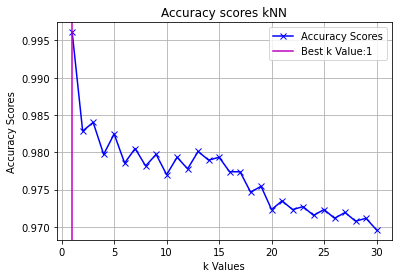

In [62]:
plt.plot(k_range_kNN ,k_scores_kNN, marker = 'x', c = 'b', label = "Accuracy Scores")
plt.axvline(best_k_kNN, c = 'm', label = ('Best k Value:' + str(round( best_k_kNN, 3))))
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel("k Values")
plt.ylabel("Accuracy Scores")
plt.title(label = "Accuracy scores kNN")
plt.show()

The figure above shows how the Accuracy score changes as a function of the k values. The figure shows as k goes from 1 to 31, the accuracy scores decreases. The highest accuracy score is achieved at K = 1. 

### Task 2.1.2


---
In this section, we fix the penalty hyper-parameter to the best k calculated in Task 2.1.1 and retrain the model on the entire data set X_Train_KNN, which has been standardised. We then use accuracy to compare the performance of the optimised classifier on the training dataset X_Train_KNN (tumour_samples) compared to that on X_Test_KNN (tumour_test).

We now retrain the kNN classified  using the optimal hyper-parameter value, best_k_kNN found in 2.1.1 and obtain accuracy scores for both training and test dataset. 

In [63]:
# compute the accuracy of the training set 
score_kNN_train = score_kNN(X_Train_KNN.to_numpy(), Y_Train_class.to_numpy(), X_Train_KNN.to_numpy(), Y_Train_class.to_numpy(), k= best_k_kNN)
print("The accuracy score on training data = " + str(score_kNN_train))
# compute the accuracy of the test set 
score_kNN_test = score_kNN(X_Train_KNN.to_numpy(), Y_Train_class.to_numpy(), X_Test_KNN.to_numpy() , Y_Test_class.to_numpy() , k= best_k_kNN)
print("The accuracy score on test data = " + str(score_kNN_test))

The accuracy score on training data = 1.0
The accuracy score on test data = 0.98


The results show that the kNN classifier can predict the training data to  an apparent perfect accuracy and almost perfect accuracy for the test data. 

This shows that the kNN classifier performs well when predicting whether a tumour is benign or malignant. 

The lowest accuracy possible is 83% if the classifier guesses only zeros as that is the proportion of zeros.

The model implies that the data is extremly local ass k = 1 performs the best.

<a name="q13"></a>

## 2.2 [^](#outline)

Task 2.2 describes the development and implementation of Random Forests classifier. 

### Task 2.2.1


---
In this task we use the data set, X_Train_Original_class, to train a random forest classifier and employ cross-entropy as the information criterion for the splits in the decision trees. We utilise grid search with 5-fold cross-validation to find the optimal value of the hyper-parameters i) the number of decision trees and ii) the depth of trees. We then use accuracy as a measure of performance for this hyper-parameter optimisation.

#### Decision tree and cross-entropy
- Decision tree algorithm is a _greedy algorithm_ that splits the data samples $\boldsymbol y$ into _left_ $\boldsymbol y_l$ and _right_ $\boldsymbol y_r$ samples, and the splitting is applied recursively on each side, resulting in a binary-tree like of splittings.
- Samples can be split given two parameters: the feature index $j$ and a value $s$.
  - **If the feature is a continuous variable**, the $s$ is used as a threshold such that samples with feature value less than $s$ are assigned to the left, and vice versa.
  - **if the feature is a categorical variable**, the $s$ is used as a predicate such that samples with feature value equals to $s$ are assigned to left, and vice versa.
- To determine $j$ and $s$ at each split node, we use Cross-Entropy to search for $j$ and $s$ that minimizes the weighted sum of Cross-Entropy of the left side samples and right side samples:
  
  $$CE(\boldsymbol y; j, s) = p_l \times CE(\boldsymbol y_l) + p_r \times CE(\boldsymbol y_r)$$

where $p_l$ and $p_r$ are, respectively, the cumulative weights of samples on the left and on the right, while $CE(\boldsymbol y)$ is defined as:

$$
\text{CE}(\boldsymbol y) = - \sum_{i=1}^Q \mathbb P (y = c_i)\log_2(\mathbb P(y = c_i))
$$

where $c_i$ is the i-th class out of $Q$ distinct classes, so $\mathbb P (y = c_i)$ reads the weight of the class $i$ in the current sample $\boldsymbol y$.


We want to allow the code to consider samples with different weights, hence introduce an additional argument called `sample_weights`. 

#### Utilising Decision Tree's within Random Forest


We build an ensemble model from individual models applied and apply this to decision trees.


One approach
for ensemble methods is bootstrapping In particular we can apply bootstrapping for multiple decision trees upon two levels:

1. Bootstrap on the training-instances: each model is trained on a random-sample (**with replacement**) from the training-instances. Eventually, decisions are aggregated across the models known as _bagging_ (Bootstrap Aggregate).

2. Feature bagging: at each split, a subset of features are considered before searching for the best split column $j$ and value $s$.


This design will leave us two hyperparameters for random forest:

1. $B$: number of decision trees.
2. `n_features`: number of features (columns) sampled, **without replacement**, at each split before searching for the best split column $j$ and value $s$. 
3. Add to these the decision trees hyperparameters like `max_depth` and `min_leaf_sample`.

The random forest classifier requires a cross-entropy function as the information criterion for the splits in the decision trees. 

In [64]:
def entropy(y, sample_weights):
    """ 
    Calculate the cross entropy for labels.
    Arguments:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (float): the cross entropy for y.

    This function calculates the cross entropy value based on thhe training labels. 
    """

    # count different labels in y，and store in label_weights
    # initialize with zero for each distinct label.
    label_weights = {yi: 0 for yi in set(y)}  
    for yi, wi in zip(y, sample_weights):
      label_weights[yi] += wi

    total_weight = sum(label_weights.values()) # sum the individual weights
    entropy = 0
    for label, weight in label_weights.items():
        entropy -= (weight / total_weight) * log2(weight / total_weight) # calculate individual entropy value

    return entropy

We define a function to split the data based on a feature (column) index and a value.

In [65]:
def split_samples(X, y, sample_weights, column, value, categorical):
    """
    Return the split of data whose column-th feature:
    1. equals value, in case `column` is categorical, or
    2. less than value, in case `column` is not categorical (i.e. numerical)

    Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for splitting.
      value: splitting threshold  the samples 
      categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
      tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
    """ 

    if categorical:
        left_mask =(X[:, column] == value)
    else:
        left_mask = (X[:, column] < value)
  
    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]
    w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

    return (X_left, X_right), (y_left, y_right), (w_left, w_right)

For a given feature index, we need to estimate the best value s tp use as threshold or predicate. We implement a function that searches for s that minimises cross-entropy.

In [66]:
def entropy_split_value(X, y, sample_weights, column, categorical): 
    """
    Calculate the cross-entropy based on `column` with the split that minimizes the cross entropy.
    Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
      (float, float): the resulted cross-entropy and the corresponding value used in splitting.
    """

    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    entropy_val, threshold = np.inf, None

    # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical)

        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue
    
        p_left = sum(w_l)/(sum(w_l) + sum(w_r))
        p_right = 1 - p_left
        new_cost = p_left * entropy(y_l, w_l) + p_right * entropy(y_r, w_r)
        if new_cost < entropy_val:
            entropy_val, threshold = new_cost, value

    return entropy_val, threshold

The second layer of sampling, i.e. _feature bagging_, requires us to implement the entropy_split_rf function to subsample from the feature columns before searching for the best split. We also utilise the entropy_split_value function defined above.

In [67]:
def entropy_split_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Choose the best feature to split according to criterion.
    Args:
      n_features: number of sampled features.
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
      (float, int, float): the minimized entropy, the best feature index and value used in splitting.
    """
  
    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False) # define the features
    columns_dict = {c: columns_dict[c] for c in columns} # pick features

    min_entropy, split_column, split_val = np.inf, 0, 0
    for column, categorical in columns_dict.items(): # iterate over the features
        # skip column if samples are not seperable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue

        # search for the best splitting value for the given column.

        entropy, val = entropy_split_value(X, y, sample_weights, column, categorical) # calculate the entropy value   
        if entropy < min_entropy:
            min_entropy, split_column, split_val = entropy, column, val

    return min_entropy, split_column, split_val

We define a function that returns the label which appears the most in our label variable y. 

In [68]:
def majority_vote(y, sample_weights):
    """
    Return the label which appears the most in y.
    Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (int): the majority label
    """
    majority_label = {yi: 0 for yi in set(y)} # find the majority label

    for yi, wi in zip(y, sample_weights):
        majority_label[yi] += wi
    return max(majority_label, key=majority_label.get)

Define a build_tree function that depends on entropy_split_rf that will build our random forest trees.

In [69]:
def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  max_depth, min_samples_leaf = 2):
  """Build the decision tree according to the data.
  Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
      max_depth: the max depth of trees for a node
  Returns:
      (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
        1. 'feature_name': The column name of the split.
        2. 'feature_index': The column index of the split.
        3. 'value': The value used for the split.
        4. 'categorical': indicator for categorical/numerical variables.
        5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
        6. 'left': The left sub-tree with the same structure.
        7. 'right' The right sub-tree with the same structure.
      
  """
  # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
  if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
      return {'majority_label': majority_vote(y, sample_weights)}
  
  else:
    ent, split_index, split_val = entropy_split_rf(n_features, X, y, sample_weights, columns_dict)  
    
    # If ent is infinity, it means that samples are not seperable by the sampled features.
    if ent == np.inf:
      return {'majority_label': majority_vote(y, sample_weights)}
    categorical = columns_dict[split_index]
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical) ## <-- SOLUTION
    return {
        'feature_name': feature_names[split_index],
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

We use our fitted decision tree to make predictions on our test data. To do this we define a function classify that takes each single data point x as an argument. 

In [70]:
def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
      (int): predicted testing sample label.
    """
    if tree['majority_label'] is not None: 
        return tree['majority_label']

    elif tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

Write a training function that constructs multiple decision trees each operating on a subset of samples.

In [71]:
def train_rf(B, max_depth, n_features, X, y,  columns_dict, sample_weights=None): #need
  """
  Build the decision tree according to the training data.
  Args:
      B: number of decision trees.
      max_depth: Max depth of decision trees
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      sample_weights: weights for each samples, of shape (N,).
  """
  if sample_weights is None:
      # if the sample weights is not provided, we assume the samples have uniform weights
      sample_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
      sample_weights = np.array(sample_weights) / np.sum(sample_weights)

  feature_names = X.columns.tolist()
  X = X.to_numpy()
  y = y.to_numpy()
  N = X.shape[0]
  training_indices = np.arange(N)
  trees = []

  for _ in range(B):
    sample = np.random.choice(training_indices, N, replace=True)
    X_sample = X[sample, :]
    y_sample = y[sample]
    w_sample = sample_weights[sample]
    tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1, max_depth = max_depth )
    
    trees.append(tree)
    
  return trees

Write a prediction function that aggregates the decision from all decision trees and returns the class with the highest probability  

In [72]:
def predict_rf(rf, X):
  """
  Predict classification results for X.
  Args:
      rf: A trained random forest through train_rf function.
      X: (pd.Dataframe) testing sample features, of shape (N, D).
  Returns:
      (np.array): predicted testing sample labels, of shape (N,).
  """

  def aggregate(decisions):
    count = defaultdict(int)
    for decision in decisions:
      count[decision] += 1
    return max(count, key=count.get)

  if len(X.shape) == 1:
      return aggregate([classify(tree, X) for tree in rf])
  else:
      return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

Define a score function, that utilises the function predic_rf to obtain predicted target variables. The function will then compare the predicted target variables to the known target variables and out an accuracy. 

In [73]:
def rf_score(rf, X_test, y_test):
  y_pred = predict_rf(rf, X_test)
  return np.mean(y_pred==y_test)

Hyper-parameter tuning for B (number of trees) and D (max depth of model) with T-fold cross-validation. We evaluate the accuracy of the model using held-out validation data. We do this by running T experiments (5) and in each one we use disjoint partitions for the training and accuracy samples. We then take the average of the accuracy estimated over the T experiments.

Define a function that evaluates the accuracy of the model with a given B and D by running T (5) experiments and returning the average evaluated accuracy. 

We also define a function that chooses the best B and D.

In [74]:
def cross_validation_score_rf(X_train, y_train, B, depth, folds, columns_dict, sample_weights = None):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array of T folds 
    B: hyper-parameter of number of trees
    depth (D): hyper-parameter of max depth of trees

    returns: average evaluated accuracy
    
    The function calculates the cross validaiton score for kNN classifier
    
    """
    
    scores = []
    for i in range(len(folds)):

        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        X_train_i = X_train.iloc[train_indexes, :]
        y_train_i = y_train.iloc[train_indexes]


        X_val_i = X_train.iloc[val_indexes, :] 
        y_val_i = y_train.iloc[val_indexes] 
        # train a random a random forest on train, then use the val scores , then repeat that for all folds
        n_features = X_train_i.shape[1] // 3
        
        rf = train_rf(int(B), int(depth), n_features, X_train_i, y_train_i, columns_dict)
        score_i = rf_score(rf, X_val_i.to_numpy(), y_val_i.to_numpy())
        
        scores.append(score_i)
    # Return the average score
    return sum(scores) / len(scores)  

In [75]:
def choose_best_hyper(X_train, y_train, B_range, depth_range, folds, columns_dict, sample_weights = None):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    B_range: Hyper-parameter Array of number of trees to make
    depth: Hyper-parameter Array of values for max depth of trees

    returns:
    hyper_score: Accuracy score for each B and D combination
    hyper_score[best_k_index] = The value of B and D that maximises the accuracy
    
    
    
    The function returns the best k value to maximise the accuracy.
    """
    

    hyper_score = np.zeros((len(B_range), len((depth_range))))

    for i, B in enumerate(B_range):
        for j, depth in enumerate(depth_range):
            hyper_score[i][j] = cross_validation_score_rf(X_train, y_train, B, depth, folds, columns_dict, sample_weights = None)
            print(f'CV_ACC@ Num Trees (B), Max Depth (D)= {B},{depth}: {hyper_score[i][j]:.3f}')
    
    c = np.where(hyper_score == hyper_score.max()) 
    
    cb,cd = np.squeeze(c[0]), np.squeeze(c[1])
    best_vals = (B_range[cb],depth_range[cd])
    return hyper_score, best_vals


We utilise choose_best_hyper to obtain the best hyper-parameter B (number of trees) and D (max depth) and a list of accuracy scores that will be plotted against corresponding B and D values. To do this we define the B and D range and utilise the fold_indexes_class defined in Task 2.1.

In [476]:
B_range_rf = np.arange(1,5,1) # define number of tree array
max_depth_range = np.arange(1,5,1) # define max depth array

In [226]:
# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(X_Train_Original_class.shape[1])}

In [227]:
X_Train_Original_rf = standardise(X_Train_Original_class)

In [228]:
# Find the best B ( num trees) and D (max depth) value based on the validation subset defined in cross-validation
np.random.seed(42)
rf_scores, best_rf_BD = choose_best_hyper(X_Train_Original_rf , Y_Train_class , B_range_rf, max_depth_range, folds_indexes_class, columns_dict, sample_weights = None)
print("The optimal hyper-parameters: B , D = " + str(best_rf_BD))
from scipy.io import savemat # save the data just in case
savemat('rf_Actual_search.mat', mdict = {'rf_scores':rf_scores, ' best_rf_BD':  best_rf_BD, 'B_range': B_range_rf, 'max_depth_range': max_depth_range})



CV_ACC@ Num Trees (B), Max Depth (D)= 1,1: 0.835
CV_ACC@ Num Trees (B), Max Depth (D)= 1,2: 0.936
CV_ACC@ Num Trees (B), Max Depth (D)= 1,3: 0.942
CV_ACC@ Num Trees (B), Max Depth (D)= 1,4: 0.957
CV_ACC@ Num Trees (B), Max Depth (D)= 2,1: 0.835
CV_ACC@ Num Trees (B), Max Depth (D)= 2,2: 0.950
CV_ACC@ Num Trees (B), Max Depth (D)= 2,3: 0.953
CV_ACC@ Num Trees (B), Max Depth (D)= 2,4: 0.962
CV_ACC@ Num Trees (B), Max Depth (D)= 3,1: 0.835
CV_ACC@ Num Trees (B), Max Depth (D)= 3,2: 0.955
CV_ACC@ Num Trees (B), Max Depth (D)= 3,3: 0.956
CV_ACC@ Num Trees (B), Max Depth (D)= 3,4: 0.972
CV_ACC@ Num Trees (B), Max Depth (D)= 4,1: 0.835
CV_ACC@ Num Trees (B), Max Depth (D)= 4,2: 0.952
CV_ACC@ Num Trees (B), Max Depth (D)= 4,3: 0.958
CV_ACC@ Num Trees (B), Max Depth (D)= 4,4: 0.972
The optimal hyper-parameters: B , D = (4, 4)


In [478]:
# import scipy.io # method to import data if needed
# mat = scipy.io.loadmat('rf_long_search.mat')
# print(mat["rf_scores"])

Figures showing the distribtuion of B and D and the resulting accuracy.

Text(33.0, 0.5, 'Max Depth')

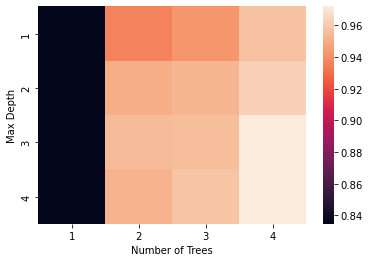

In [477]:
# create a heatmap
sns.heatmap(rf_scores, xticklabels = B_range_rf, yticklabels = max_depth_range )
plt.xlabel("Number of Trees")
plt.ylabel("Max Depth")


The figure shows as the number of trees increases as does the accuracy of the model. This is also true as the max depth increases so does the accuracy. The figure shows that the optimal number of trees and Max depth is 4 and 4. However, due to computational and time limits, we are not able to examine the depth and number of trees greater than this. This may mean that the optimal value that maximises the accuracy may exist at a higher value.  

We expect that once the optimal value is reached the accuracy then begins to decrease as B and D is increased.

### Task 2.2.2


---
In this task we compare the performance of the optimal random forest classifier on the data set, X_Train_Original_class, to the performance on the test data X_Test_Original_class. We use different measures computed from the confusion matrix such as accuracy, recall and F1-score.

We define a function called confusion matrix, which will build a confusion matrix that we can then infer values from such as true positive value. 

In [233]:
def confusion_matrix(y_train, y_pred):
    """
    y_train: N x 1 vector of training targets/observations
    y_pred: N x 1 vector of predicted target variables
    
    returns: An array containing true positive, true negative, false positive, false negative
    
    """
    # true postive 
    tp = np.sum(np.logical_and(y_train, y_pred))
    
    # true negative
    tn = np.sum( np.logical_and(np.logical_not(y_train),  np.logical_not(y_pred) ) )
    
    # false positive
    fp = np.sum(np.logical_and(np.logical_not(y_train), y_pred))
    
    # false negative
    fn = np.sum(  np.logical_and(y_train,np.logical_not(y_pred) ))
    
    return np.array([tp, tn, fp, fn])

We define functions that will return the accuracy, precision, recall, specificity and F1 score which will be used in analysis further down. 

In [234]:
def accuracy(con_mat):
    """
    con_mat: An array made by confusion_matrix function that has tp, tn, fp, fn
    
    returns: Accuracy
    """
    return (con_mat[0] + con_mat[1])/np.sum(con_mat)

def precision(con_mat):
    """
    con_mat: An array made by confusion_matrix function that has tp, tn, fp, fn
    
    returns: precision
    """
    return con_mat[0]/(con_mat[0] + con_mat[2])

def recall(con_mat):
    """
    con_mat: An array made by confusion_matrix function that has tp, tn, fp, fn
    
    returns: recall
    """
    return con_mat[0] / (con_mat[0] + con_mat[3])

def specificity(con_mat):
    """
    con_mat: An array made by confusion_matrix function that has tp, tn, fp, fn
    
    returns: specificity
    """
    return con_mat[1]/(con_mat[1] + con_mat[2])

def F_score(con_mat):
    """
    con_mat: An array made by confusion_matrix function that has tp, tn, fp, fn
    
    returns: F1 score
    """
    
    precision_val = precision(con_mat)
    recall_val = recall(con_mat)
    return (2*precision_val * recall_val )/(precision_val + recall_val)


We utilise the best hyper-parameters (Num of Trees (B) and Max Depth (D)) found in task 2.2.1 to train a random forest, using X_Train_Original_class. Using this trained forest we then use it to predict both the training set target variables and test set target variables.

In [235]:
# Divide the number of features for X_train by 3
n_features_train_rf = X_Train_Original_class.shape[1] // 3

In [236]:
# train a random forest based on the best hyper-parameters
np.random.seed(42)
rf_train = train_rf(best_rf_BD[0], best_rf_BD[1], n_features_train_rf, X_Train_Original_class,Y_Train_class, columns_dict)

In [237]:
# predict the Y_Train values based on the random forest classifier
Y_train_pred_RF = predict_rf(rf_train, X_Train_Original_class.to_numpy())

# predict the Y_Test values based on the random forest classifier
Y_test_pred_RF = predict_rf(rf_train, X_Test_Original_class.to_numpy())



In [238]:
# Create confusion matricies for training and test data

train_confusion = confusion_matrix(Y_Train_class.to_numpy(),Y_train_pred_RF)
test_confusion = confusion_matrix(Y_Test_class.to_numpy(),Y_test_pred_RF)

We utilise the two developed confusion matricies to define accuracy, precision, recall and F1-Score for both the training and test dataset.

In [239]:
# Below shows the accuracy, precision, recall and F1-Score of applying the trained random forest model to training and test dataset
features_rf = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_comp = [accuracy(train_confusion),precision(train_confusion), recall(train_confusion), F_score(train_confusion)]
test_comp = [accuracy(test_confusion), precision(test_confusion), recall(test_confusion), F_score(test_confusion)]
rf_results  = {'Performance':features_rf, 'Training Set':train_comp, 'Test Set' : test_comp}
rf_results_frame = pd.DataFrame(rf_results)
rf_results_frame

,Performance,Training Set,Test Set
0,Accuracy,0.977397,0.945000
1,Precision,0.979058,0.984375
2,Recall,0.882075,0.863014
3,F1-score,0.928040,0.919708


The accuracy is shown in the tables highlight that the Data set (training) has higher accuracy than the test set. This is because accuracy is heavily affected by imbalanced data which is the case in both.  This means that accuracy is not a good performance measurement method to use for both training and test sets because both are imbalanced. 

Recall looks at the number of false negatives that were predicted. Therefore the recall rate is reduced when a false negative is predicted and therefore recall should be 1 (highest) for a good classifier. We see that the recall rate is low as expected because we have a significantly low number of positives (1). However given the skewed data the score of recall is still relatively high for both Training and Test.

F1 score takes into account both precision and recall. This becomes 1 when precision and recall are both 1, which is the optimum value a good classifier should have. As the F1 score is the harmonic mean of precision and recall and ios, therefore, a better measure than accuracy.  We see that the F1 score for the training set is lower than the test set, which means that it is a better predictor for performance for imbalanced data.


<a name="q13"></a>

## 2.3 [^](#outline)

In this task we create a Support vector machine (SVM) classifier.

#### Linear SVM Formulation

In Support Vector Machines (SVM) we start with defining the hinge loss as
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (\boldsymbol w \cdot x_i + b) \bigg) \, .
$$
where $\boldsymbol w$ is the vector of weights, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s.

### Data preparation SVM


---

In this section we need to prepare the training and test data that will; be used further in the Task. We will be using tumour_samples, tumour_test. Now we want to replace the 'B' (benign) with -1's and not 0 as done above for the training target values. 

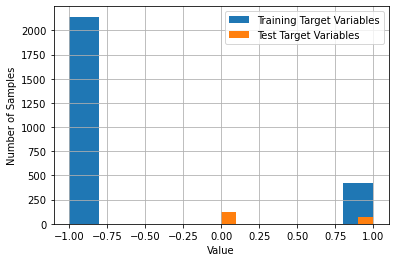

In [132]:
# Utilise previously defined training and test set data, but now introduce an intercept and standarise the data.

# Define Training Data
X_Train_Original_SVM = tumour_samples.iloc[:,1:31] 
Y_Train_SVM = tumour_samples['DIAGNOSIS']

# Replace benign with -1 and Malignant with 1
Y_Train_SVM = Y_Train_SVM.replace({'B':-1.0,'M':1.0})
Y_Train_SVM.hist(label = "Training Target Variables")

# Define Test data
X_Test_Original_SVM = tumour_test.iloc[:,1:31]
Y_Test_SVM = tumour_test['DIAGNOSIS']

# Do bloean replacement as done in previous tasks
Y_Test_SVM = Y_Test_SVM.replace({'B':0,'M':1.0})
Y_Test_SVM.hist(label = "Test Target Variables")

plt.legend()
plt.xlabel("Value")
plt.ylabel("Number of Samples")
plt.show()

We now standarise and introduce an intercept term to both the training and test data.

In [133]:
# Standarise the data
X_Train_Original_SVM = standardise(X_Train_Original_SVM) # train data
X_Test_Original_SVM = standardise(X_Test_Original_SVM) # test data

# Introduce the intercept
X_Train_Original_SVM.insert(loc=len(X_Train_Original_SVM.columns) , column='intercept', value=1)
X_Test_Original_SVM.insert(loc=len(X_Test_Original_SVM.columns) , column='intercept', value=1) # add a 1 in vvery row for intercept b

In [ ]:
# Show the table of training data to confirm that it is as expected.

In [134]:
X_Test_Original_SVM.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,intercept
0,-0.158009,0.253096,-0.087826,-0.244110,0.988219,0.781036,0.695338,0.923871,1.124585,1.371562,...,0.634344,0.245316,0.000443,1.134760,0.824559,0.985983,1.398791,1.169080,1.482425,1
1,-0.214231,1.314819,-0.281740,-0.303039,-0.617859,-0.937514,-0.713742,-0.689795,-0.762283,-1.006056,...,1.390559,-0.446114,-0.420560,-0.159912,-0.901741,-0.584643,-0.779138,-0.815197,-0.919968,1
2,0.025451,-0.837807,-0.047249,-0.088009,-1.201822,-0.869388,-0.796395,-0.535407,-0.876179,-1.003325,...,-1.078310,-0.281502,-0.309089,-1.318303,-0.930173,-0.907560,-0.447155,-1.350830,-0.963526,1
3,0.096467,-0.274398,0.022373,-0.004630,-2.185713,-0.934796,-0.749579,-0.873262,-0.701539,-1.003325,...,-0.093741,0.009709,-0.048724,-1.724876,-0.219380,-0.510677,-0.550159,-0.481296,-0.424077,1
4,-0.267493,-0.218282,-0.345382,-0.347236,-0.481954,-1.198241,-0.739081,-0.463765,-1.339354,-0.625037,...,-0.499152,-0.660674,-0.593739,-1.608582,-1.273269,-0.967875,-0.928087,-1.609951,-1.265640,1


### Task 2.3.1


---
In this section, we train a soft margin linear SVM classifier on the dataset X_Train_Original_class (tumour_samples) and use the same 5-fold cross-validation subsets defined in 2.1.1 to optimise the hardness hyper-parameter that regulates the boundary violation penalty. 

We then use accuracy as a measure of performance for this hyper-parameter optimisation. We then display the accuracy of the SVM classifiers as the hardness hyper-parameter is varied. 

We define a compute_cost function as described in the equation above. 

In [135]:
def compute_cost(w, X, y, regul_strength):
    """
    w : vector of weights
    X: N X K Matrix of values
    y: N X 1 vector of values
    
    regul_strenght: Hyper-parameter 
    
    return: The computed cost
    """
    n = X.shape[0] # obtain sample number
    distances = 1 - y * (X @ w)  # perform computation
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean() 

    # calculate cost
    return 0.5 * np.dot(w, w) + hinge

To implement this algorithm we implement and utilise stochastic gradient descent algorithm and so we define a function to calculate the cost gradients with repect to w.

In [415]:
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength):
    """
    w : vector of weights
    X_batch : N X K Matrix of values
    y_batch : N X 1 vector of values
    
    regul_strenght: Hyper-parameter 
    
    return: The computed gradient cost
    """
    
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w)) # perform computation based on hinge loss
    dw = np.zeros(len(w))
   

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = w
        else:
            di = w - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    return dw/len(y_batch)  # average

The functions compute_cost and calculate_cost_gradient functions are used in SGD to update the weights iteratively with a given learning rate $\alpha$. We also implement a stop criterion that ends the learning as soon as the cost function has not changed more than a manually determined percentage.

We know that the learning happens through updating the weights according to
$$
\boldsymbol w = \boldsymbol w - \alpha \frac{\partial \mathcal L}{\partial \boldsymbol w}
$$

where $\frac{\partial \mathcal L}{\partial \boldsymbol w}$ is the gradient of the hinge loss we have computed in the previous cell.

In [416]:
def sgd(X, y, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    """
    X : N X K Matrix of values
    y : N X 1 vector of values
    batch_size: The number of batches to split the data into
    max_iterations: number of iterations to perform in gradient decent
    stop_criterion: Ends the learning  as soon as the cost function has not changed more than the determiend value.
    learning_rate: Learning rate for gradient descent
    
    regul_strenght: Hyper-parameter 
    
    return: The computed weights
    
    """
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf

    # stochastic gradient descent
    
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        X_b, y_b = X[batch_idx], y[batch_idx]
        for xi, yi in zip(X_b, y_b):
            ascent = calculate_cost_gradient(weights, xi, yi, regul_strength)
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost(weights, X, y, regul_strength) 
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
              
            prev_cost = cost
            nth += 1
    
    return weights

Define a score function, that will evaluate the mean accuracy given weights w. The function will compare the predicted target variables to the known target variables.

In [417]:
def score_SVM(w, X, y):
    """
    w: weights K X 1
    X: N x K
    y: N x 1
    
    returns: Average mean accuracy
    """
    
    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y)

Define a function that evaluates the accuracy of the model with a given regul_strength by running T (5) experiments and returning the average evaluated accuracy. 

We also define a function that chooses the best regul_strength. 

In [418]:
def cross_val_evaluate_SVM(X_train, y_train, folds, k):
    
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: number of T folds 
    k : hyper-parameter regul_strenght
    
    returns: average evaluated accuracy

    The function calculates the cross validaiton score for SVM classifier

    """
   
    val_scores = []
    
    for i in range(len(folds)):
    

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(y_train.shape[0])) - set(val_indices))

        X_train_i = X_train[train_indices,  :]  
        y_train_i = y_train[train_indices]
        
        
        # define the validation set
        X_val_i = X_train[val_indices, :]
        y_val_i = y_train[val_indices]  
        
        # train the model
        w = sgd(X_train, y_train,batch_size = 32,  max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=k)


        # evaluate
        train_score = score_SVM(w, X_train_i, y_train_i)
        val_score = score_SVM(w, X_val_i, y_val_i)
      

        # train_scores.append(train_score)
        val_scores.append(val_score)

    return sum(val_scores)/len(val_scores)

In [419]:
def choose_best_SVM(X_train, y_train, folds, k_range):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    B_range: Hyper-parameter Array of number of trees to make
    depth: Hyper-parameter Array of values for max depth of trees

    returns:
    hyper_score: Accuracy score for each B and D combination
    hyper_score[best_k_index] = The value of B and D that maximises the accuracy



    The function returns the best k value to maximise the accuracy.
    """

    k_scores = np.zeros((len(k_range),))
    score = []
    for i, k in enumerate(k_range):
        val = cross_val_evaluate_SVM(X_train, y_train, folds, (k))
        k_scores[i] = val
        score.append(val)
        print(f'CV_ACC@ Lambda= {k}: {k_scores[i]:.5f}')
    
    best_k_index = np.argmax(k_scores)

    return k_range[best_k_index], k_scores

We utilise choose_best_SVM to obtain the best hyper-parameter regul strength ($\lambda$) and a list of accuracy scores that will be plotted against corresponding $\lambda$ values. To do this we define the fold indexes and also the $\lambda$ range.

In [420]:
# Define folds and also lambda range
folds_indexes_SVM = np.array_split(np.arange(len(Y_Train_SVM )), 5)
lambda_range_SVM = np.arange(0,2000, 100)

In [421]:
best_lam_SVM, acc_score_SVM = choose_best_SVM(X_Train_Original_SVM.to_numpy(), Y_Train_SVM.to_numpy(), folds_indexes_SVM,lambda_range_SVM)
print("The optimal hyper-parameters: Regul Strength , lambda = " + str(best_lam_SVM))

CV_ACC@ Lambda= 0: 0.00000
CV_ACC@ Lambda= 100: 0.98714
CV_ACC@ Lambda= 200: 0.98948
CV_ACC@ Lambda= 300: 0.98948
CV_ACC@ Lambda= 400: 0.98987
CV_ACC@ Lambda= 500: 0.99065
CV_ACC@ Lambda= 600: 0.98987
CV_ACC@ Lambda= 700: 0.99026
CV_ACC@ Lambda= 800: 0.99143
CV_ACC@ Lambda= 900: 0.99065
CV_ACC@ Lambda= 1000: 0.98870
CV_ACC@ Lambda= 1100: 0.99065
CV_ACC@ Lambda= 1200: 0.99065
CV_ACC@ Lambda= 1300: 0.99065
CV_ACC@ Lambda= 1400: 0.98909
CV_ACC@ Lambda= 1500: 0.98987
CV_ACC@ Lambda= 1600: 0.98948
CV_ACC@ Lambda= 1700: 0.99143
CV_ACC@ Lambda= 1800: 0.99026
CV_ACC@ Lambda= 1900: 0.99143
The optimal hyper-parameters: Regul Strength , lambda = 800


Figure below shows accuracy as function of the hardness hyper-parameter regul strength (lambda).

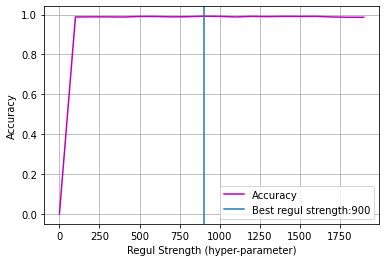

In [168]:
plt.plot(lambda_range_SVM, acc_score_SVM, label = "Accuracy", c = 'm')
plt.axvline(best_lam_SVM, label = ('Best regul strength:' + str(round(best_lam_SVM, 3))))
plt.grid()
plt.xlabel("Regul Strength (lambda)")
plt.ylabel ("Accuracy")
plt.legend()
plt.show()

The figure shows that initially for Regul Strength of around 0 the accuracy is at its lowest and this then increases rapidly as Regul Strength increases. This accuracy then plateaus and remains relatively constant with slight fluctuations.  


### Task 2.3.2


---
In this task, we evaluate the performance of the SVM classifiers obtained as the hardness hyper-parameter is varied by applying each of them to the test data tumour_test.csv. We then represent results using a receiver operating characteristic curve (ROC) curve where each point a plot by varying the hyper-parameter regul strength and obtaining a false positive rate (FPR )(x-axis) and a True positive Rate (TPR) (y-axis)


Define a function which plots the ROC curve.

In [197]:
def roc_curve(X_train, y_train, X_test, y_test, k_range):
    """
    X_train: N X k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    
    X_test: D x k validation / test set 
    y_test: D X 1 validation set that will be comapred to the predicted values
    k_range : Range of hyper-parameter lambda (regul strength
    
    returns: True positive Rate (tpr) and False positive rate (fpr )as arrays
    con_fu: Confusion Matrix of the last value
    """
    tpr = []
    fpr = []
    
    for k in k_range: 
        w = sgd(X_train, y_train ,batch_size = 32,  max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=k) # run the support vvector machine model
        y_pred = np.sign(X_test @ w) # predic observables based on model
        y_pred[y_pred == -1] = 0 # set obsrvables == -1 to 0 

        con_fu = confusion_matrix(y_test, y_pred) # utilise the confusion matrix funciton
    
       

        tpr.append(recall(con_fu)) # calculate and append recall values
        fpr_val = 1 -  specificity(con_fu) # calculate fpr and append
        fpr.append(fpr_val)
       
    
    return fpr, tpr, con_fu

In [198]:
# Define a new range of lambda (hyper-param)
lambda_range_SVM_ROC  = np.arange(1,1e4,200)

In [202]:
# Run the roc_cruve function with the train and test set
np.random.seed(42)
fpr, tpr, con_fu_test = roc_curve(X_Train_Original_SVM.to_numpy(),Y_Train_SVM.to_numpy(), X_Test_Original_SVM.to_numpy() , Y_Test_SVM.to_numpy(), lambda_range_SVM_ROC)

We plot the Roc curve for training with test set , which is tpr as a function of fpr. 

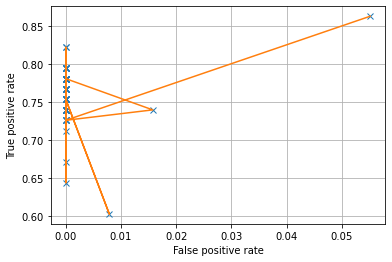

In [203]:
# A plot for tpr as a function of fpr
plt.plot(fpr, tpr, ls = " ", marker = 'x')
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()

### Task 2.3.3


---

In this task we evaluate the performance of the SVM classifiers by training them on tumour_samples_bal, a balanced data set, and then testing it on the same data as above. We use ROC curves to compare and discuss the performance of SVM classifiers learnt from the unbalanced data set tumour_samples, obtained from the tasks above. 

### Data preparation SVM


---

In this section, we need to prepare tumour_samples_bal as done at the beginning of the task. 

In [185]:
# Read the data as a pandas frame
tumour_samples_bal = pd.read_csv('tumour_samples_bal.csv')

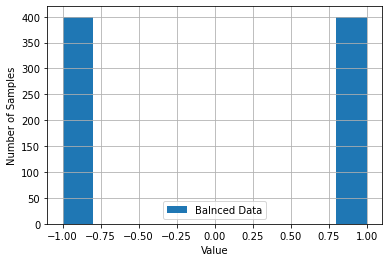

In [190]:
# Define training data
X_Train_bal = tumour_samples_bal.iloc[:,1:31] 
Y_Train_bal= tumour_samples_bal['DIAGNOSIS']

# Set benign to -1 and Malign to 1
Y_Train_bal = Y_Train_bal.replace({'B': -1.0 ,'M':1.0})
Y_Train_bal.hist(label = "Balnced Data")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Number of Samples")
plt.show()

In [191]:
# Standarise the X training data from bal
X_Train_bal = standardise(X_Train_bal) # train data

# Introduce an intercept term
X_Train_bal.insert(loc=len(X_Train_bal.columns) , column='intercept', value=1)
X_Train_bal.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,intercept
0,-0.076769,0.155494,-0.438521,-0.123671,0.812338,0.877962,0.885343,0.482654,0.993280,1.208277,...,0.835237,0.089990,-0.003362,0.662108,0.491975,0.943470,0.970121,0.994710,1.240415,1
1,0.238921,-1.801808,0.222109,-0.122452,2.020106,0.805259,1.154354,1.266576,0.664028,0.953263,...,-1.511413,0.120661,0.121633,0.950084,0.672660,1.435423,0.775828,0.084607,1.136884,1
2,1.681789,2.029641,1.004584,1.643057,-0.403647,-0.103266,0.784921,0.488104,-1.650607,-1.270780,...,1.590680,1.300345,1.070877,-0.859955,-0.215508,0.461683,0.323959,-0.319231,-0.118300,1
3,1.641539,0.321468,1.033080,1.287240,0.362797,0.106954,1.143283,1.017267,0.742005,-0.712651,...,0.381850,0.884446,0.656920,-0.605559,-0.317626,0.268234,0.816133,-0.643798,-0.642667,1
4,1.947845,0.781970,1.550066,1.522585,-0.045952,0.640177,1.905047,1.758304,1.161870,-0.363396,...,0.077996,1.623423,1.301962,-0.441505,0.494503,1.737147,1.139848,0.214740,-0.776175,1


In [204]:
# Train the Roc curve using the balanced data
np.random.seed(42)
fpr_bal, tpr_bal, con_fu_bal = roc_curve(X_Train_bal.to_numpy(),Y_Train_bal.to_numpy(), X_Test_Original_SVM.to_numpy() , Y_Test_SVM.to_numpy(),lambda_range_SVM_ROC)


We plot the Roc curve for the balanced data, which is tpr as a function of fpr. 

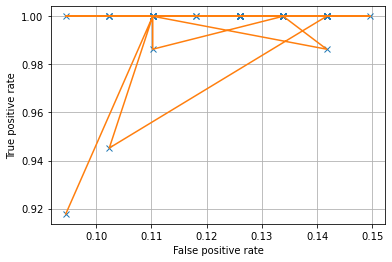

In [205]:
# A plot for tpr as a function of fpr
plt.plot(fpr_bal, tpr_bal, ls = " ", marker = 'x')
plt.plot(fpr_bal, tpr_bal)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
plt.show()

The ROC curve shows that a majority of the lambda values give a True positive rate of 1 regardless of the false positive rate. Comparing the False positive values of the balanced data to the normal training data shows that the training data has a lower FPR on average whereas the TPR for training data is lower on average than the balanced training data. This is to be expected as the original training data is heavily biased skewed towards a greater proportion of 'B' than the balanced data. 

We utilise the confusion matricies of the last lambda value for Train with Test and Balanced Train with test to define accuracy, precision, recall and F1-Score for all three data sets. 

In [206]:
# Below shows the accuracy, precision, recall and F1-Score of applying the trained random forest model to training and test dataset
features_rf = ['Accuracy', 'Precision', 'Recall', 'F1-score']
test_comp = [accuracy(con_fu_test),precision(con_fu_test), recall(con_fu_test), F_score(con_fu_test)]
bal_comp = [accuracy(con_fu_bal), precision(con_fu_bal), recall(con_fu_bal), F_score(con_fu_bal)]

rf_results  = {'Performance':features_rf, 'Training Set':test_comp, 'Balanced Set' : bal_comp}
rf_results_frame = pd.DataFrame(rf_results)
rf_results_frame

,Performance,Training Set,Balanced Set
0,Accuracy,0.905000,0.925000
1,Precision,1.000000,0.829545
2,Recall,0.739726,1.000000
3,F1-score,0.850394,0.906832


Although the confusion matrix was based on the large confusion matrix developed within the roc_curve function, it nonetheless gives us a comaprssion tool to see how the different datasets are performing in comparison to one another. 

We see that the accuracy of using the balanced data set is higher. This is expected as accuracy performs worse for unbalanced data.  

We see that the recall score is signifincatly greater in the balanced data. We also see that the F1-score for the balanced data is greater than the training set. 

<a name="task-3"></a>

# Task 3: Classification [^](#outline)

<a name="q13"></a>

## 3.1 [^](#outline)

In this task we develop and implement a logistic regression classifier on the data set (tumour_samples).*italicized text*

### Data preparation Logistic Regresssion and Bagging


---

In this section we need to prepare the training and test data that will; be used further in the Task. We will be using tumour_samples, tumour_test.

In [240]:
# Defining training set
X_Train_Original_Log = tumour_samples.iloc[:,1:31]
Y_Train_Log = tumour_samples['DIAGNOSIS']

# Define test set
X_Test_Original_Log = tumour_test.iloc[:,1:31]
Y_Test_Log = tumour_test['DIAGNOSIS']

Y_Train_Log = Y_Train_Log.replace({'B':0,'M':1})

Y_Test_Log= Y_Test_Log.replace({'B':0,'M':1})



Y_Train_Log = Y_Train_Log.astype(int)
Y_Test_Log = Y_Test_Log.astype(int)
X_Train_Original_Log.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_radius,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension
0,10.855170,15.248290,69.167041,359.534878,0.105488,0.080200,0.066410,0.034194,0.182796,0.066968,...,11.344586,18.984557,81.443134,466.879302,0.149080,0.200185,0.205695,0.111592,0.335999,0.093477
1,10.068958,15.532758,66.130635,330.040665,0.099813,0.109540,0.057583,0.023322,0.195650,0.069572,...,11.144049,22.840293,82.133171,473.367822,0.125478,0.330466,0.283304,0.088021,0.312882,0.096158
2,12.271409,18.100314,78.195610,421.537832,0.105147,0.095315,0.043317,0.031539,0.188801,0.063341,...,13.880914,26.365608,84.598334,620.586067,0.146766,0.118707,0.147900,0.050402,0.291805,0.069556
3,10.531733,18.452486,67.227069,340.063033,0.086041,0.049961,0.049709,0.011046,0.203093,0.064948,...,10.820798,24.385385,73.296855,429.675600,0.100060,0.143683,0.177225,0.028111,0.287749,0.073174
4,12.367686,14.399191,80.643814,460.849710,0.106410,0.101420,0.020806,0.021990,0.195326,0.064605,...,12.998422,19.614305,89.910502,472.323112,0.138135,0.276127,0.151098,0.074396,0.345258,0.095830


We now standarise for both the training and test data.

In [241]:
# Standarise the data
X_Train_Original_Log = standardise(X_Train_Original_Log)
X_Test_Original_Log = standardise(X_Test_Original_Log)

X_Train_Original_Log.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_radius,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension
0,-0.753620,-0.781944,-0.756208,-0.691192,0.795331,-0.229173,0.016809,-0.056448,0.205748,0.593922,...,-0.862074,-0.917431,-0.542509,-0.539631,0.952722,-0.113721,-0.046192,0.349680,1.058718,0.739598
1,-1.026098,-0.714547,-0.908606,-0.798950,0.394105,0.418584,-0.117782,-0.409785,0.689330,0.965225,...,-0.914166,-0.272301,-0.516669,-0.524781,-0.122474,0.874757,0.381668,-0.077973,0.629072,0.904300
2,-0.262795,-0.106226,-0.303063,-0.464663,0.771226,0.104522,-0.335314,-0.142754,0.431667,0.076883,...,-0.203232,0.317545,-0.424354,-0.187868,0.847312,-0.731913,-0.364817,-0.760494,0.237368,-0.729835
3,-0.865714,-0.022787,-0.853575,-0.762333,-0.579567,-0.896766,-0.237844,-0.808775,0.969354,0.306026,...,-0.998135,-0.013780,-0.847568,-0.624772,-1.280421,-0.542413,-0.203148,-1.164913,0.161978,-0.507602
4,-0.229428,-0.983118,-0.180188,-0.321036,0.860507,0.239303,-0.678556,-0.453083,0.677145,0.257057,...,-0.432470,-0.812064,-0.225426,-0.527172,0.454089,0.462473,-0.347187,-0.325157,1.230799,0.884131


### 3.1.1 
---
In this task, we train a logistic regression classifier on the data set tumour_samples.csv, with gradient descent for 5000 iters using a learning rate of 0.005. We then measure the accuracy of the classifier using the decision threshold of 0.5. 

In logistic regression, we learn parameters $\boldsymbol \beta$ and $\beta_0$ similar to linear regression, but pass the output through a logistic function in the end. We call the output of this operation $\hat{\boldsymbol y}_{\text{log}}$:
$$
\hat{\boldsymbol y}_{\text{log}} = f(\boldsymbol \beta^T \boldsymbol X + \beta_0)
$$
where $\boldsymbol X = [X^{(1)}, X^{(2)}, \dots, X^{(n)}]$, and $X^{(i)} \in \mathbb R^d$.

$f$ is the logistic function and, consequently, we have a _probability_ of the given data point belonging to one of the two classes. We label any data point with probability greater than $0.5$ as 1, and any data point with probability less or equal to $0.5$ as 0.

We know that **logistic regression parameters can be estimated by maximizing the log-liklihood function**. **Equivalently, we may minimize the cost function, that is the negative log-liklihood**, which is given by:
$$
\mathcal L = - \frac{1}{n} \sum_{i=1}^n y^{(i)} \log(\hat{y}_{\text{log}}^{(i)}) + (1-y^{(i)}) \log (1-\hat{y}_{\text{log}}^{(i)}) \, .
$$
We will use gradient descent to optimise this cost function. The derivatives with respect to $\boldsymbol \beta$ and $\beta_0$ are:
$$
\frac{\partial \mathcal L}{\partial \boldsymbol \beta} = \frac{1}{n} \sum_{i=1}^n X^{(i)} (\hat{y}_{\text{log}}^{(i)} - y^{(i)})^T
$$
 
$$
\frac{\partial \mathcal L}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_{\text{log}}^{(i)} - y^{(i)})
$$

We define a logistic function.

In [243]:
def logistic(x):
    """
    x: Value or an array

    returns: Compute value based on logistic equation
    """
    return 1.0 / (1.0 + np.exp(-x))

Define a function predict_log that maps X linearly using  β  and  β0  parameters then computes the probabilities.

In [244]:
def predict_log(X, beta, beta_0):
    """
    X: N x k Matrix of values
    beta: k x 1 Matrix
    beta_0 : offset 

    returns: predicts vaules of the observables
    """
   
    y_log = logistic(X.T @ beta + beta_0)
    return y_log.squeeze()

We define a parameter initialisation function, wich initialises $\beta$ and $\beta_0$ with zeros

In [246]:
def initialise(d):
  """    
  Argument:
  d: size of the beta vector (or number of parameters)
  
  Returns:
  beta: initialised vector of shape (d, 1)
  beta_0: initialised scalar (corresponds to the offset)
  """
  
  beta = np.zeros(shape=(d, 1), dtype=np.float64) # create an array of zeros
  beta_0 = 0
  
  assert(beta.shape==(d, 1))
  assert(isinstance(beta_0, float) or isinstance(beta_0, int))
  
  return beta, beta_0

We implement a propagate function (forward pass) which will have the cost function and its derivatives. 

In [247]:
def propagate(X, y, beta, beta_0):
    """
    Arguments:
    X: data of size (d, n)
    y: true label vector of size (1, n)
    beta: parameters, a numpy array of size (d, 1)
    beta_0: offset, a scalar

    Returns:
    cost: negative log-likelihood cost for logistic regression
    dbeta: gradient of the loss with respect to beta
    dbeta_0: gradient of the loss with respect to beta_0
    """
    n = X.shape[1]
    y_log = predict_log(X, beta, beta_0)


    # cost function
    cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()

    # derivatives
    dbeta = (X * (y_log - y)).mean(axis=1).reshape(-1, 1)#
    dbeta_0 =  (y_log - y).mean()  


    assert(dbeta.shape==beta.shape)
    assert(dbeta_0.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape==())

    # store gradients in a dictionary
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
    return grads, cost

With these gradients and the cost, we can conduct the optimisation and update the $\boldsymbol \beta$ and $\beta_0$ with a learning rate $\alpha$, which we shall set to $0.005$. The implment updating procedure $\boldsymbol \beta$
$$
\boldsymbol \beta = \boldsymbol \beta - \alpha \ \frac{\partial \mathcal L}{\partial \boldsymbol \beta}
$$
and for offset $\beta_0$
$$
\beta_0 = \beta_0 - \alpha \ \frac{\partial \mathcal L}{\partial \beta_0} \, .
$$

In [248]:
def optimise(X, y, beta, beta_0, num_iterations=5000, learning_rate=0.005, print_cost=False):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar
  num_iterations: number of iterations gradient descent shall update the parameters
  learning_rate: step size in updating procedure
  print_cost: whether to print the cost every 100 iterations or not

  Returns:
  params: dictionary containing the parameters beta and offset beta_0
  grads: dictionary containing the gradients
  costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
  """
  costs = []
    
  for i in range(num_iterations): 

      # calculate cost and gradients
      grads, cost = propagate(X, y, beta, beta_0) 
      
      # retrieve derivatives from grads
      dbeta = grads["dbeta"]
      dbeta_0 = grads["dbeta_0"]
      
      # updating procedure
      beta = beta - learning_rate * dbeta  
      beta_0 = beta_0 - learning_rate * dbeta_0  
      
      # record the costs
      if i % 100 == 0:
          costs.append(cost)
      
      # print the cost every 100 iterations
      if print_cost and i % 100 == 0:
          print ("cost after iteration %i: %f" %(i, cost))
  
  # save parameters and gradients in dictionary
  params = {"beta": beta, "beta_0": beta_0}
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return params, grads, costs

We define a function predict, that predicts the labels of our predicted observables.

In [249]:
def predict(X_test, beta, beta_0):
  """
  Arguments:
  X_test: test data of size (d, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  y_pred: vector containing all binary predictions (0/1) for the examples in X_test
  """
  n = X_test.shape[1]
  y_pred = np.zeros((1,n))
  beta = beta.reshape(X_test.shape[0], 1)
  
  
  # compute vector y_log predicting the probabilities
  y_log = predict_log(X_test, beta, beta_0)
  
  y_pred = y_log.round().reshape(1, -1) # decision threshold part
  
  
  assert(y_pred.shape==(1, n))
  
  return y_pred

Define a function that collates all the algorithms defined above and contains all the hyper-parameters. 

In [294]:
def model(X_train, y_train, X_test, y_test,num_iterations=5000, learning_rate=0.005, print_cost=False):
    """
    Arguments:
    X_train: data of size (d, n)
    y_train: true label vector of size (1, n)
    X_test: test data (k, p)
    y_test: test true observables (1,p)


    num_iterations: number of iterations gradient descent shall update the parameters
    learning_rate: step size in updating procedure
    print_cost: whether to print the cost every 100 iterations or not

    Returns:
    params: dictionary containing the parameters beta and offset beta_0
    grads: dictionary containing the gradients
    costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
    """
  
  
    # initialize parameters with zeros

    beta, beta_0 = initialise(X_train.shape[0])


    # gradient descent
    parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost)

    # retrieve parameters beta and beta_0 from dictionary "parameters"
    beta = parameters["beta"]
    beta_0 = parameters["beta_0"]


    # predict test and train set examples
    y_pred_test = predict(X_test, beta, beta_0)
    y_pred_train = predict(X_train, beta, beta_0)

    # # print train/test Errors
    # print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    # print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    # saving all information
    d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations}

    return d

Define a score function that returns the accuracy of the classifier.

In [251]:
def log_score(y_pred, y_test):
    # return np.mean(y_pred==y_test)
    return (1 - np.mean(np.abs(y_pred - y_test)))

We train the logistic regression classifier on the training data to obtain parameters $\beta$ and $\beta_0$ and use these params to predict both the test and training observables. 

In [252]:
# Train the Model
log_model_basic = model(X_Train_Original_Log.to_numpy().T , Y_Train_Log.to_numpy().T,  X_Test_Original_Log.to_numpy().T,Y_Test_Log.to_numpy().T, num_iterations=5000, learning_rate=0.005, print_cost=False)

Obtain the accuracies of the model when running for training data and test data.

In [253]:
# Accuracy for training data compared to actual training values
y_train_pred_log_acc = log_score(log_model_basic["y_pred_train"], Y_Train_Log.to_numpy())
print("Accuracy of training data = " + str(" ")+ str(y_train_pred_log_acc))

y_test_pred_log_acc = log_score(log_model_basic["y_pred_test"], Y_Test_Log.to_numpy())
print("Accuracy of test data = " + str(" ")+ str(y_test_pred_log_acc ))


Accuracy of training data =  0.9859703819173812
Accuracy of test data =  0.915


In [254]:
# Create confusion matricies for training and test data
train_confusion_log_basic = confusion_matrix(Y_Train_Log.to_numpy() ,log_model_basic["y_pred_train"])

test_confusion_log_basic = confusion_matrix(Y_Test_Log.to_numpy(),log_model_basic["y_pred_test"])


In [346]:
# Below shows the accuracy, precision, recall and F1-Score 
features_rf = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_comp_log_basic = [accuracy(train_confusion_log_basic),precision(train_confusion_log_basic), recall(train_confusion_log_basic), F_score(train_confusion_log_basic)]
test_comp_log_basic = [accuracy(test_confusion_log_basic), precision(test_confusion_log_basic), recall(test_confusion_log_basic), F_score(test_confusion_log_basic)]
log_basic_results  = {'Performance':features_rf, 'Training Set':train_comp_log_basic, 'Test Set' : test_comp_log_basic}
log_basic_results_frame = pd.DataFrame(log_basic_results)
log_basic_results_frame

,Performance,Training Set,Test Set
0,Accuracy,0.985970,0.915000
1,Precision,0.977833,1.000000
2,Recall,0.936321,0.767123
3,F1-score,0.956627,0.868217


The results show that the accuracy for the training set is greater than the test set. The recall score for the training set is significantly higher than the test set. The precision score for the test set is higher than the training set. 

The F1-score is higher for the training set than the test set. 

Overall the performance measurements show tha the Training set performs better than the Test set using the basic logistic regression classifier. 

### 3.1.2
---
In this task, we implement the code that applies bagging to the training of the logistic regression classifier with 5-fold cross-validation to choose the optimal number of bootstrap samples. 

We define a predict function that predicts the classification results for x. 

In [256]:
def predict_log_agg(models_list, y, key_name):
    """
    Predict classification results for X.
    Args:
        rf: A trained random forest through train_rf function.
        X: (pd.Dataframe) testing sample features, of shape (N, D).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """
    N = len(y)
    m = len((models_list))
    y_models = np.zeros((m,N)) # define matrix of zeros
    y_pred = np.zeros((N,))
    def aggregate(decisions): # function that aggregates the decision from all predictions and returns most predicted
        count = defaultdict(int)
        for decision in decisions:
            count[decision] += 1
        return max(count, key=count.get) # return value that occurs the most
    

    for x in range(len(models_list)):
        y_models[x] = models_list[x][key_name].squeeze() # append for every model
    
    for col in range(N):
        y_pred[col] = aggregate(y_models[:,col]) # obtain aggregated prediction of the models
    
    return y_pred

We define a bagging function in which we create a set of models which are created from a subset of samples.  

In [359]:
def bagging(X_train_i, y_train_i ,X_val_i, y_val_i , B , num_iterations, learning_rate, print_cost=False):

    """
    Arguments:
    X_train: data of size (d, n)
    y_train: true label vector of size (1, n)
    X_val_i: validation data (k, p)
    y_val_i: validation observables (1,p)

    B: hyper-parameter to define the number of bootsstraps

    num_iterations: number of iterations gradient descent shall update the parameters
    learning_rate: step size in updating procedure
    print_cost: whether to print the cost every 100 iterations or not

    Returns:
    list of models
    """


    N = X_train_i.shape[1]
    training_indices = np.arange(N)
    models_list = []
    
    # in each fold we creating a set of models, which are  created from a subset of samples
    for _ in range(B):
        sample = np.random.choice(training_indices, N, replace=True)
       
        
        X_train_i_sample = X_train_i[:,  sample] 
        y_train_i_sample = y_train_i[sample]
        
        
        # train the model 
        log_model = model(X_train_i_sample, y_train_i_sample, X_val_i, y_val_i, num_iterations=5000, learning_rate=0.005, print_cost=False) # actual
       
        
        models_list.append(log_model)
    return models_list

Define a function that evaluates the accuracy of the model with a given B (bootstraps) by running T (5) experiments and returning the average evaluated accuracy. 

We also define a function that chooses the best B.

In [360]:
def cross_val_evaluate_log(X_train, y_train, folds, B ,num_iterations= 5000, learning_rate=0.005, print_cost=False ):
    """
    Arguments:
    X_train: data of size (d, n)
    y_train: true label vector of size (1, n)
    folds: array of T folds 

    B: hyper-parameter to define the number of bootstraps

    num_iterations: number of iterations gradient descent shall update the parameters
    learning_rate: step size in updating procedure
    print_cost: whether to print the cost every 100 iterations or not

    Returns:
    average accuracy of the validation sets over all folds
    """

    val_scores = []
   
    for i in range(len(folds)):
        
        val_indices = folds[i]
        
        # define the training set
        train_indices = list(set(range(y_train.shape[0])) - set(val_indices))

        X_train_i = X_train[:,  train_indices]  
        y_train_i = y_train[train_indices]
       
        
        # define the validation set
        X_val_i = X_train[:, val_indices]
        y_val_i = y_train[val_indices]  



        models_list = bagging(X_train_i, y_train_i, X_val_i, y_val_i, B, num_iterations, learning_rate, print_cost) # perform bagging which creates the models

        y_pred_val = predict_log_agg(models_list, y_val_i,"y_pred_test" ) # use the aggregate function to predict the y validation observables

        # evaluate
        
        val_score = log_score(y_pred_val, y_val_i) # obtain a validation score
        
        val_scores.append(val_score)
   
    return sum(val_scores)/len(val_scores)

In [361]:
def choose_best_B(X_train, y_train, folds, B_range ,num_iterations=5000, learning_rate=0.005, print_cost=False ):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    B_range: Hyper-parameter Array of number of bootstrap samples
   

    returns:
    B_scores: Accuracy score for each B
    B_range[best_k_index]:  The value of B that maximises the accuracy
    


    The function returns the best B value to maximise the accuracy and the accuracy scores for all B
    """
    B_scores = np.zeros((len(B_range),))
    score = []
    for i, k in enumerate(B_range):
        val = cross_val_evaluate_log(X_train, y_train, folds, int(k) ,num_iterations, learning_rate, print_cost )
        B_scores[i] = val
        score.append(val)
        print(f'CV_ACC@ B= {k}: {B_scores[i]:.5f}')
    
    best_k_index = np.argmax(B_scores)
    return B_range[best_k_index], B_scores

We define a folds_indexes to run the model for this task, which will perform cross-validaiton. We then define a range of B values which is the hyper-parameter (bootstrap samples)  

In [362]:
folds_indexes_log = np.array_split(np.arange(len(Y_Train_Log)), 5)
B_range = np.arange(1,16,2)

In [363]:
# Run the model to employ cross-validaiton to determine the optimal hyper-parameter B (bootstrap samples)
best_B_log , B_scores_log =choose_best_B(X_Train_Original_Log.to_numpy().T , Y_Train_Log.to_numpy().T ,  folds_indexes_log , B_range, num_iterations=5000, learning_rate=0.005, print_cost=False)
print("The best B value is = ",best_B_log )

CV_ACC@ B= 1: 0.98558
CV_ACC@ B= 3: 0.98402
CV_ACC@ B= 5: 0.98480
CV_ACC@ B= 7: 0.98441
CV_ACC@ B= 9: 0.98402
CV_ACC@ B= 11: 0.98441
CV_ACC@ B= 13: 0.98441
CV_ACC@ B= 15: 0.98324
The best B value is =  1


Figure below shows how the accuracy changes as the value of B changes

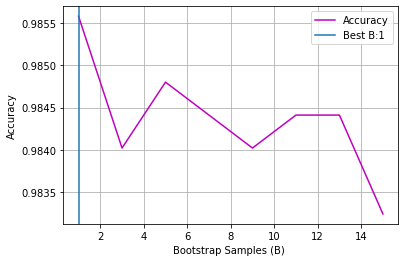

In [364]:
plt.plot(B_range, B_scores_log, label = "Accuracy", c = 'm')
plt.axvline(best_B_log, label = ('Best B:' + str(round(best_B_log, 3))))
plt.grid()
plt.xlabel("Bootstrap Samples (B) ")
plt.ylabel ("Accuracy")
plt.legend()
plt.show()

### 3.1.3
---
In this task, we implement the code that applies bagging to the training of the logistic regression classifier with 5-fold cross-validation to choose the optimal number of bootstrap samples. 

We utilise the optimal hper-parameter B found above and utilise the bagging method to obtain a list of models, by training it on tumour_samples.

In [365]:
# Create a model based on the optimal value of B
# models_list_bag_B = bagging(X_Train_Original_Log.to_numpy().T, Y_Train_Log.to_numpy().T , X_Test_Original_Log.to_numpy().T , Y_Test_Log.to_numpy().T , best_B_log , num_iterations = 5000, learning_rate = 0.005, print_cost = False)
models_list_bag_B = bagging(X_Train_Original_Log.to_numpy().T, Y_Train_Log.to_numpy().T , X_Test_Original_Log.to_numpy().T , Y_Test_Log.to_numpy().T , 8 , num_iterations = 5000, learning_rate = 0.005, print_cost = False)

We predict the training and test observables based on the models created above.

In [366]:
# Predict observables based on the model above
y_pred_train_log_bag = predict_log_agg(models_list_bag_B, Y_Train_Log.to_numpy().T,"y_pred_train")
y_pred_test_log_bag = predict_log_agg(models_list_bag_B, Y_Test_Log.to_numpy().T,"y_pred_test")

In [367]:
# Create confusion matricies for training and test data
train_confusion_log_bag = confusion_matrix(Y_Train_Log.to_numpy() ,y_pred_train_log_bag)
test_confusion_log_bag = confusion_matrix(Y_Test_Log.to_numpy(),y_pred_test_log_bag)

In [368]:
# Below shows the accuracy, precision, recall and F1-Score for the bootstrap algorithm
features_rf = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_comp_log_bag = [accuracy(train_confusion_log_bag),precision(train_confusion_log_bag), recall(train_confusion_log_bag), F_score(train_confusion_log_bag)]
test_comp_log_bag = [accuracy(test_confusion_log_bag), precision(test_confusion_log_bag), recall(test_confusion_log_bag), F_score(test_confusion_log_bag)]
log_bag_results  = {'Performance':features_rf, 'Training Set':train_comp_log_bag, 'Test Set' : test_comp_log_bag}
log_bag_results_frame = pd.DataFrame(log_bag_results)
log_bag_results_frame

,Performance,Training Set,Test Set
0,Accuracy,0.830086,0.915000
1,Precision,0.269231,1.000000
2,Recall,0.016509,0.767123
3,F1-score,0.031111,0.868217


In [369]:
# below shows the results for Task 3.1.1, model without bootstrap
log_basic_results_frame

,Performance,Training Set,Test Set
0,Accuracy,0.985970,0.915000
1,Precision,0.977833,1.000000
2,Recall,0.936321,0.767123
3,F1-score,0.956627,0.868217


The results show that for bootstrap aggregating model, the Training set performs significantly worse than the training set for the normal model in 3.1.1. We also see that the test set in the normal model seems to perform slightly better for accuracy, recall and F1-score, whereas the precision score is identical.

<a name="q13"></a>

## 3.2 [^](#outline)

Kernelised SVM classifier

#### Kernelissed SVM Formulation

We now define the hinge loss function as 
$$
\mathcal L (\boldsymbol w) = \frac{1}{2} \| \boldsymbol w \|^2 + \frac{\lambda}{n} \sum_{i=1}^n \max \bigg( 0, 1-y_i (k(w,x^i) + b) \bigg) \, 
$$
where $\boldsymbol k(w,x^i)$ is the Gaussian radial basis function, $\lambda$ the regularisation parameter, and $b$ the intercept which is included in our `X` as an additional column of $1$'s. The radian basis function is defined as;

$$
k(w,x^i) = e^{\frac{-||w-x||^2}{\sigma}}
$$
where $\sigma$ is the RBF hardness hyper-parameter we want to find.

In order to implement this model with gradient descent we need to calculate the derivative of the radial function which is given by:

$$
\triangledown k(w,x) = -\frac{2(w-x)e^{\frac{-(w-x)^2}{\sigma}}}{\sigma}
$$

### Task 3.2.1


---

In this task we utilise the code of the linear SVM developed in task 2.3.1 and implement a soft margin kernelised SVM classifier with a Radial Basic Function (RBF) kernel. In this task we utilise the code of the linear SVM developed in task 2.3.1 and implement a soft margin kernelised SVM classifier with a Radial Basic Function (RBF) kernel. 

Define a compute cost function that is now adjusted to include the kernel model

In [469]:
def compute_cost_kernel(w, X, y, regul_strength, RBF ):
    """
    w : vector of weights
    X: N X K Matrix of values
    y: N X 1 vector of values
    RBF: Kernel hyper-parameter
    
    regul_strenght: Hyper-parameter 
    
    return: The computed cost
    """
    n = X.shape[0] # obtain sample number
 
    k = np.exp((-abs(w - X)**2)/RBF)
    k = np.sum(k)
   
    distances = 1 - y * (k)  # perform computation
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean() 

    # calculate cost
    return 0.5 * np.dot(w, w) + hinge

Calculate the gradient descent cost

In [470]:
def calculate_cost_gradient_kernel(w, X_batch, y_batch, regul_strength, RBF):
    """
    w : vector of weights
    X_batch : N X K Matrix of values
    y_batch : N X 1 vector of values
    regul_strenght: Hyper-parameter 
    RBF: Kernel hyper-parameter
    
    return: The computed gradient cost
    """
    
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    k = np.exp((-abs(w - X_batch)**2)/RBF) # radial basis function
    k = np.sum(k)
    distance = 1 - y_batch * (k) # perform computation based on hinge loss
    dw = np.zeros(len(w))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = w
        else:
            di = w - (regul_strength * y_batch[ind] * (-(2*(w - X_batch[ind]*np.exp(-((w - X_batch[ind])**2))/RBF ))/RBF))
        dw += di

    return dw/len(y_batch)  # average

The functions compute_cost_kernel and calculate_cost_gradient_kernel functions are used in SGD_kernel to update the weights iteratively with a given learning rate $\alpha$. We also implement a stop criterion that ends the learning as soon as the cost function has not changed more than a manually determined percentage.

We know that the learning happens through updating the weights according to
$$
\boldsymbol w = \boldsymbol w - \alpha \frac{\partial \mathcal L}{\partial \boldsymbol w}
$$

where $\frac{\partial \mathcal L}{\partial \boldsymbol w}$ is the gradient of the hinge loss we have computed in the previous cell.

In [471]:
def sgd_kernel(X, y,RBF, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    """
    X : N X K Matrix of values
    y : N X 1 vector of values
    batch_size: The number of batches to split the data into
    max_iterations: number of iterations to perform in gradient decent
    stop_criterion: Ends the learning  as soon as the cost function has not changed more than the determiend value.
    learning_rate: Learning rate for gradient descent
    RBF: Kernel hyper-parameter
    regul_strenght: Hyper-parameter 
    
    return: The computed weights
    
    """
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf

    # stochastic gradient descent
    
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        X_b, y_b = X[batch_idx], y[batch_idx]
        for xi, yi in zip(X_b, y_b):
            ascent = calculate_cost_gradient_kernel(weights, xi, yi, regul_strength,RBF)
            
            
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(weights, X, y, regul_strength, RBF) 
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
              
            prev_cost = cost
            nth += 1
    
    return weights

### Task 3.2.2


---

In this task we fix the hardness hyper-parameter regul strength to that found in 2.3.3 and train the soft margin kernalised SVM classifier with RBF kernl on the data set tumour_samples_bal, using the 5-fold cross-validation to find optimal hyper-parameter of the RBF kernel. 

In [472]:
def score_kernel(w, X, y, RBF):
    """
    w: weights K X 1
    X: N x K
    y: N x 1
    RBF: Kernel hyper-parameter
    
    returns: Average mean accuracy
    """

    y_preds = np.sign(np.exp((-abs(w - X)**2)/RBF))
    return np.mean(y_preds == y)

Define the crosss-validation function for the kernalised model

In [473]:
def cross_val_evaluate_kernel(X_train, y_train, folds, k, RBF):
    
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: number of T folds 
    k : hyper-parameter regul_strenght
    RBF: Kernel hyper-parameter
    returns: average evaluated accuracy

    The function calculates the cross validaiton score for SVM classifier

    """
   
    val_scores = []
    
    for i in range(len(folds)):
    

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(y_train.shape[0])) - set(val_indices))

        X_train_i = X_train[train_indices,  :]  
        y_train_i = y_train[train_indices]
        
        
        # define the validation set
        X_val_i = X_train[val_indices, :]
        y_val_i = y_train[val_indices]  
        
        # train the model
        w = sgd_kernel(X_train, y_train,RBF = RBF,batch_size = 32,  max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength = k)


        # evaluate
        train_score = score_kernel(w, X_train_i, y_train_i, RBF)
        val_score = score_kernel(w, X_val_i, y_val_i, RBF)
        
      

        # train_scores.append(train_score)
        val_scores.append(val_score)

    return sum(val_scores)/len(val_scores)

In [452]:
def choose_best_kernel(X_train, y_train, folds, lam, RBF_range):
    """
    X_train: N x k matrix of training inputs
    y_train: N x 1 vector of training targets/observations
    folds: array indexes split evenly into T folds 
    lam : Hardness Hyper-parameter Array for linear SVM
    depth: Hyper-parameter Array of values RBF hyper-param

    returns:
    k_scores: Accuracy score for each RBF combination
    RBF_range[best_k_index] = The value of RBF that maximises the accuracy



    The function returns the best k value to maximise the accuracy.
    """

    k_scores = np.zeros((len(RBF_range),))
    score = []
    for i, k in enumerate(k_range):
        val = cross_val_evaluate_kernel(X_train, y_train, folds, lam, k)
        print(val)
        k_scores[i] = val
        score.append(val)
        print(f'CV_ACC@ RBF = {k}: {k_scores[i]:.5f}')
    
    best_k_index = np.argmax(k_scores)

    return RBF_range[best_k_index], k_scores

In [453]:
RBF_range = np.arange(1,100,10)

Unfortunately due to time constraints I was not able to complete this code, however I did have an understanding of where the code would head. Utilising the Kernalsied method would have helped classifying the data and may have increased accuracy. 

In [ ]:
best_RBF_SVM, acc_score_RBF = choose_best_kernel(X_Train_Original_SVM.to_numpy(), Y_Train_SVM.to_numpy(), folds_indexes_SVM,best_lam_SVM,RBF_range)
